# Travel Insurance

#### Created By: Asyraf Al Rasyid

## 1. `Business Problem Understanding	`

### 1.1 Context

Asuransi perjalanan adalah salah satu jenis asuransi yang memberikan perlindungan selama kita melakukan perjalanan baik dalam maupun luar negeri.
Beberapa orang mungkin masih asing dengan asuransi perjalanan, tapi pada saat ini beberapa negara di dunia bahkan sudah mewajibkan para turis atau para pendatang untuk memiliki asuransi perjalanan, contohnya seperti negara-negara di Eropa dan Amerika. Asuransi perjalanan pada umumnya memiliki harga yang sangat murah atau mungkin hanya sepersekian apabila dibandingkan dengan total harga perjalanan dan benefit yang bisa didapatkan.Ada perusahaan asuransi yang menawarkan premi mulai dari Rp15.000, yang berbeda yang disesuaikan denga pertanggungan yang diinginkan, lama perjalanan dan tujuan perjalanan.

Kemudian apa saja yang manfaat yang didapatkan dengan penggunaan asuransi perjalanan ? Pada dasarnya asuransi perjalanan menawarkan manfaat berupa pertanggungan biaya medis wisatawan selama perjalanan, kemudian juga perlindungan, seperti perlindungan akan keterlambatan penerbangan, kehilangan bagasi, penundaan jadwal perjalanan hingga pembatalan penerbangan, sampai perlindungan terhadap rumah apabila bepergian meninggalkan rumah dalam jangka waktu yang cukup lama. [(Sumber: OJK)](https://sikapiuangmu.ojk.go.id/FrontEnd/CMS/Article/20551)

 Dalam kasus ini, perusahaan yang bergerak di bidang asuransi perjalanan ingin mengetahui pemegang surat perjanjian asuransi atau pemegang polis-nya akan mengajukan klaim asuransi untuk mendapatkan coverage atau tidak. Data dalam dataset ini merupakan data historis yang terdiri dari tujuan, produk asuransi, dan lain-lain di miliki oleh perusahaan asuransi perjalanan berdasarkan pemegang polisnya.

### 1.2 Problem Statement

Dalam industri asuransi perjalanan, pengajuan klaim yang tidak terduga dapat memberikan dampak signifikan terhadap aliran kas dan pengelolaan risiko perusahaan. Untuk mengatasi hal ini, perusahaan asuransi ingin mengembangkan sebuah model prediktif yang dapat secara akurat menentukan probabilitas pengajuan klaim berdasarkan berbagai faktor seperti produk asuransi, destinasi, durasi perjalanan, dan profil demografis pemegang polis. Model ini diharapkan dapat membantu perusahaan dalam membuat keputusan yang lebih tepat dalam menentukan apakah seseorang akan melakukan klaim atau tidak pada asuransi perjalanannya

### 1.3 Goals

- Mengidentifikasi fitur-fitur yang paling berpengaruh terhadap kemungkinan klaim.
- Mengembangkan model prediktif yang dapat dengan akurat memprediksi kemungkinan klaim berdasarkan data yang tersedia.
- Memberikan rekomendasi untuk modifikasi produk atau strategi penargetan untuk meminimalkan risiko klaim dan meningkatkan kepuasan pelanggan.

### 1.4 Analytic Approach

Pendekeatan analisis yang akan dilakukan dalam penelitian ini yaitu untuk menemukan suatu pola yang dapat membedakan pemegang polis yang akan melakukan klaim asuransi dan yang tidak, kemudian setelah didapatkan polanya, kita akan membangun model klasifikasi yang akan membantu perusahaan pemegang asuransi untuk dapat memprediksi kemungkinan pemegang polis akan melakukan klaim asuransi atau tidak

### 1.5 Metric Evaluation

ROC berguna dalam memvisualisasikan dan mengukur kemampuan model untuk membedakan antara klaim yang valid dan tidak valid. Metrik ini tidak terpengaruh oleh perubahan dalam distribusi kelas atau threshold klasifikasi, membuatnya sangat berguna untuk evaluasi awal model prediktif.

Skor ROC-AUC yang tinggi menunjukkan bahwa model memiliki probabilitas tinggi untuk membedakan dengan benar antara positif dan negatif di berbagai tingkat threshold, yang penting untuk menemukan keseimbangan yang tepat antara menangkap klaim yang valid dan menghindari klaim.


In [142]:
# Library

import numpy as np
import pandas as pd

import missingno
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Data Splitting
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Preprocessing
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

# Resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,  balanced_accuracy_score

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# Save Model
import pickle

## 2. `Data Understanding	`

Untuk melakukan analisis, diperlukan untuk mengenal dataset terlebih dahulu dalam tahapan *data understanding*.


In [143]:
data = pd.read_csv('data_travel_insurance.csv')
display(data.head(),data.tail())

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No
44327,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,172,SINGAPORE,0.0,17.82,31,No


Dataset ini berisi informasi terkait tujuan perjalanan, agensi perjalanan, tipe agensi produk asuransi, jenis kelamin, distribusi layanan, durasi perjalanan dalam hari,  jumlah harga penjualan sesuai asurasinya, usia, dsb. Ada 11 Features dalam dataset ini

- Agency: Nama agensi asuransi perjalanan
- Agency Type: Tipe asuransi perjalanan
- Distribution Channel: Penyaluran produk kepada konsumen
- Product Name: Jenis produk asuransi yang digunakan turis
- Gender: Jenis kelamin
- Duration: Durasi perjalanan dalam hari
- Destination: Tujuan perjalanan
- Net Sales: Jumlah harga penjualan asuransi perjalanan (dalam dollar singapore)
- Commission (in value): Komisi yang didapatkan agensi asuransi perjalanan
- Age: Usia turis
- Claim: Claim status.

In [144]:
display(data.describe(), data.describe(include='object'))

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


Berdasarkan tabel diatas diketahui beberapa hal seperti berikut:
1. Numerical Feature:
    - Feature `Duration` memiliki rentang yang sangat luas dari -1 hingga 4,881 hari, dan terdapat nilai negatif yang tidak masuk akal yang perlu ditangani 
    - Feature `Net Sales` memiliki rentang data dari -357.5 dollar hingga 810 dollar
    - `Commision (in value)` memiliki rentang nilai dari 0 hingga 283.5 dollar, yang sepertinya terdapat outlier pada upperbound karena rata-rata data sebesar 75%nya hanya memiliki 11.55 dollar yang nanti akan dicek lebih lanjut
    - `Age` memiliki rentang usia dari 0 - 118 tahun, sepertinya pada feature ini juga terjadi outlier pada upperbound atau lowerbound nya, yang akan dicek lebih lanjut nanti

2. Categorical Feature:
    - Feature `Agency` memiliki 16 unique data, dan frekuensi terbanyak adalah agensi EPX melebihi 50% data
    - Feature `Agency Trip` memiliki 2 unique data dan frekuensi terbanyak adalah tipe `travel agency` yang melebihi 50% datanya
    - Feature ` Distribution Channel` memiliki 2 unique data dan frekuensi terbanyak adalah online sebanyak 90% data
    - Feature `Product name` memiliki 26 unique data dan frekuensi terbanyak adalah produk asuransi _Cancellation Plan_ dengan jumlah data sebesar sekitar 29%
    - Feature `Gender` memiliki 2 unique data dan frekuensi terbanyaknya terdapat pada jenis kelamin laki-laki atau ditandai M
    - Feature `Destination` memiliki 138 unique data dan frekuensi terbanyaknya terdapat pada tujuan destinasi Singapore atau sebesar 20.9%
    -Feature `Claim` memiliki 2 unique data dan frekuensi terbanyaknya terdapat memiliki claim status `No` yang melebihi 90% datanya

In [145]:
print(f'Jumlah baris dan kolom: {data.shape}')

Jumlah baris dan kolom: (44328, 11)


In [146]:
pd.DataFrame({
    'column': data.columns.values,
    'data_type': data.dtypes.values,
    'null(%)': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col]< 0).any() else False for col in data.columns],
    '0_value(%)': [len(data[col][data[col] == 0]) / len(data) * 100 if col in data.select_dtypes(include=[np.number]).columns else 0 for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,column,data_type,null(%),negative,0_value(%),n_unique,sample_unique
0,Agency,object,0.000000,False,0.000000,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, ..."
1,Agency Type,object,0.000000,False,0.000000,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0.000000,False,0.000000,2,"[Online, Offline]"
3,Product Name,object,0.000000,False,0.000000,26,"[Annual Silver Plan, Cancellation Plan, Basic ..."
4,Gender,object,71.392799,False,0.000000,2,"[F, nan, M]"
5,Duration,int64,0.000000,False,0.106028,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 37..."
6,Destination,object,0.000000,False,0.000000,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KO..."
7,Net Sales,float64,0.000000,True,2.912380,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 8..."
8,Commision (in value),float64,0.000000,False,55.777387,915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88,..."
9,Age,int64,0.000000,False,0.004512,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 5..."


Secara umum, kita bisa melihat bahwa:
* Dataset Travel Insurance memiliki 11 feature dan 44.328 baris

* Dari 11 feature terdapat 7 feature tipe data object, 2 feature tipe integer dan 2 feature tipe data float.
* Feature `Gender` memiliki data kosong. Data kosong pada feature tersebut diwakili dengan data NaN.
* Feature `Duration`,`Net Sales`,`Commision (in value)`, dan `Age`, memiliki nilai 0, tetapi tidak semua feature tersebut tidak dibolehkan bernilai 0. 
* beberapa feature seperti `Net Sales`, memiliki data yang lebih kecil dari angka 0 atau memiliki nilai yang negatif. hal tersebut akan ditangani lebih lanjut
* Target atau kolom `Claim status` memiliki value dengan tipe object yaitu `no` dan `yes`. untuk selanjutnya tipe value target akan dirubah menjadi integer. Dengan pengaturan seperti berikut
    - `no` = 0
    - `yes` = 1

<Axes: >

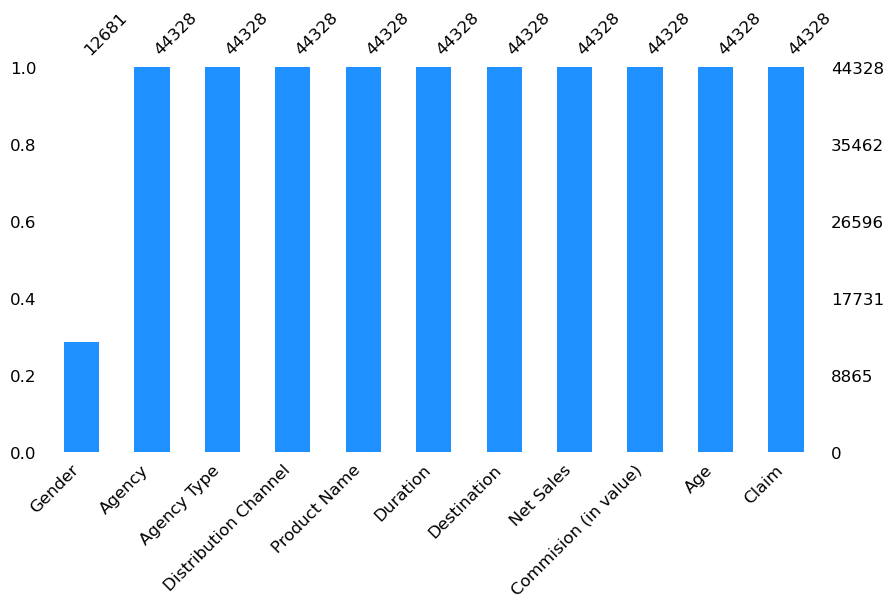

In [147]:
missingno.bar(data,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

Terlihat dari grafik barplot missingno diatas bahwa hanya feature `Gender`yang memiliki missing value dan jumlah data yang dimilikinya dibawah 40% dari total jumlah data yang tersedia, hal tersebut akan ditangani lebih lanjut nanti

Feature `Commision (in value)` di ubah namanya menjadi `Commision` agar lebih mudah apabila dibutuhkan untuk melakukan coding

In [148]:
data = data.rename(columns={'Commision (in value)':'Commision'})

## 3. `Exploratory Data Analysis	(EDA)`

Selanjutnya kita akan melakukan EDA dimana statistik dan visualisasi digunakan untuk memahami struktur, karakteristik, dan pola dalam dataset. Tujuan utama dari EDA adalah untuk menemukan wawasan awal dan membentuk hipotesis tentang data yang dapat digunakan untuk analisis lebih lanjut

### 3.1 Numerical Variables

In [149]:
numerical = [var for var in data.columns if data[var].dtypes not in ['object']]

In [150]:
from scipy.stats import normaltest

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(data[feature_name].dropna())
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,Duration,106362.302085,0.0,Not Normally Distributed
1,Net Sales,32695.931743,0.0,Not Normally Distributed
2,Commision,37939.755693,0.0,Not Normally Distributed
3,Age,28763.309947,0.0,Not Normally Distributed


Berdasarkan feature numerikal dalam dataset ini tidak terdapat feature dengan data yang terdistribusi normal

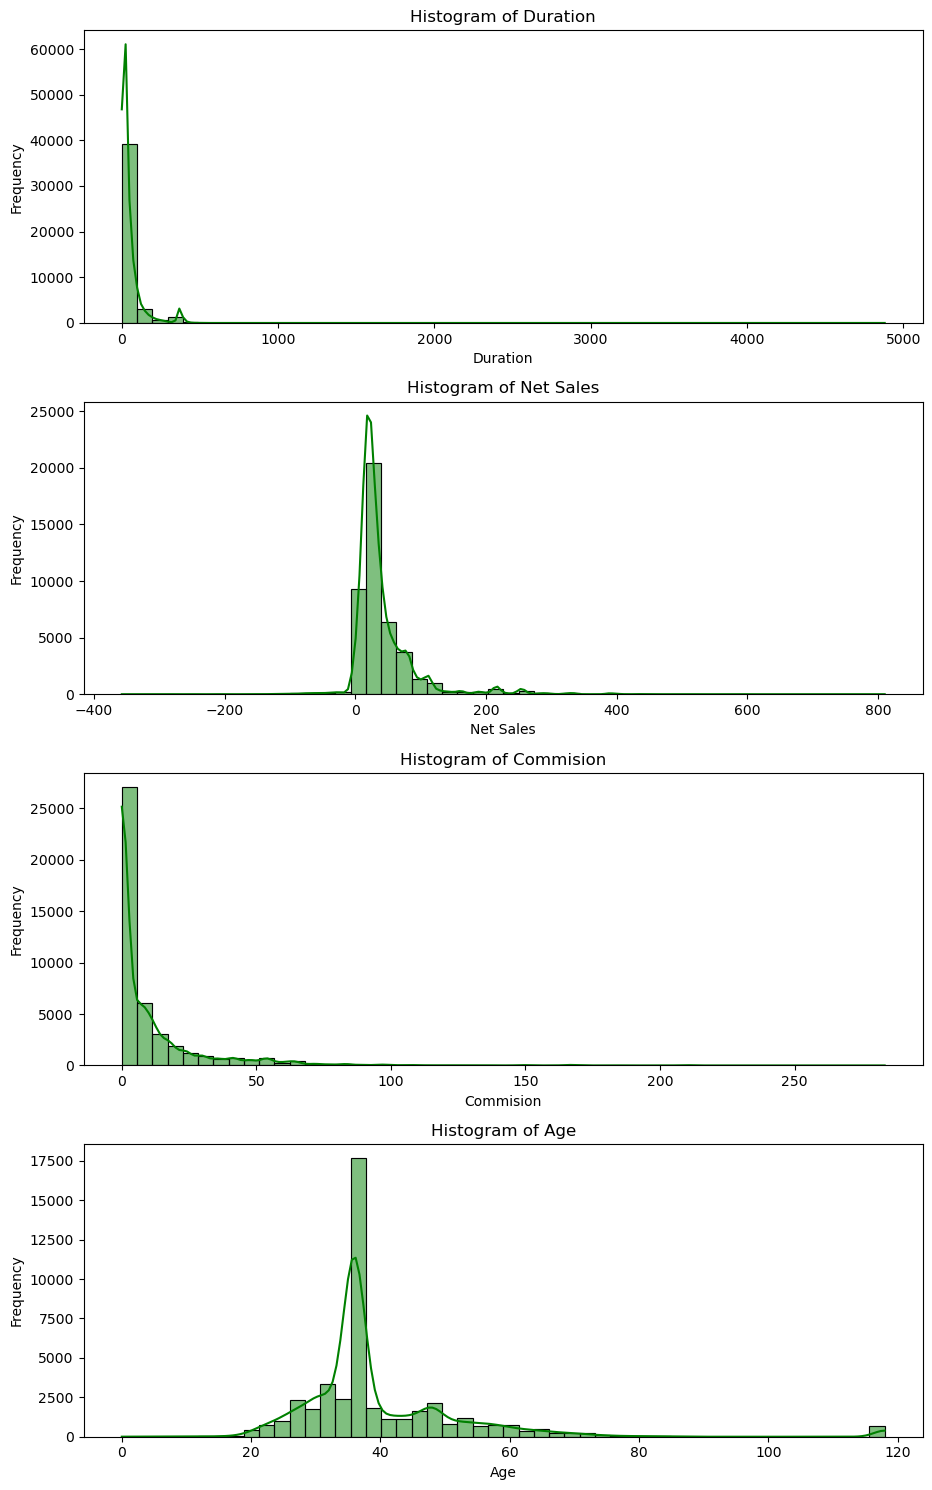

In [151]:
plt.figure(figsize=(18, 15))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(data[col], kde=True, color='green', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- `Duration`: Terdapat konsentrasi tinggi pada durasi yang lebih pendek, dengan sebagian besar perjalanan kurang dari 100 hari. Kita dapat melihat ada beberapa nilai ekstrem yang memberi jarak terhadap median atau mean distribusi.

- `Net Sales`: Distribusi penjualan bersih menunjukkan bahwa sebagian besar polis memiliki nilai rendah, dengan beberapa nilai tinggi yang lebih sedikit.
- `Commision`: Sebagian besar transaksi menghasilkan komisi yang rendah, namun ada sejumlah komisi yang tinggi yang menunjukkan beberapa polis dengan komisi lebih besar, kemungkinan dari produk premium atau grup.
- `Age`: Distribusi usia menunjukkan bahwa pelanggan terkonsentrasi pada kelompok usia pertengahan, sekitar 30 hingga 50 tahun. Tetapi terdapat juga pencilan dimana terdapat usia yang melebihi 100 tahun.

Dilihat pada grafik barplot diatas terlihat bahwa distribusi feature numerikal memang tidak terdistribusi normal 

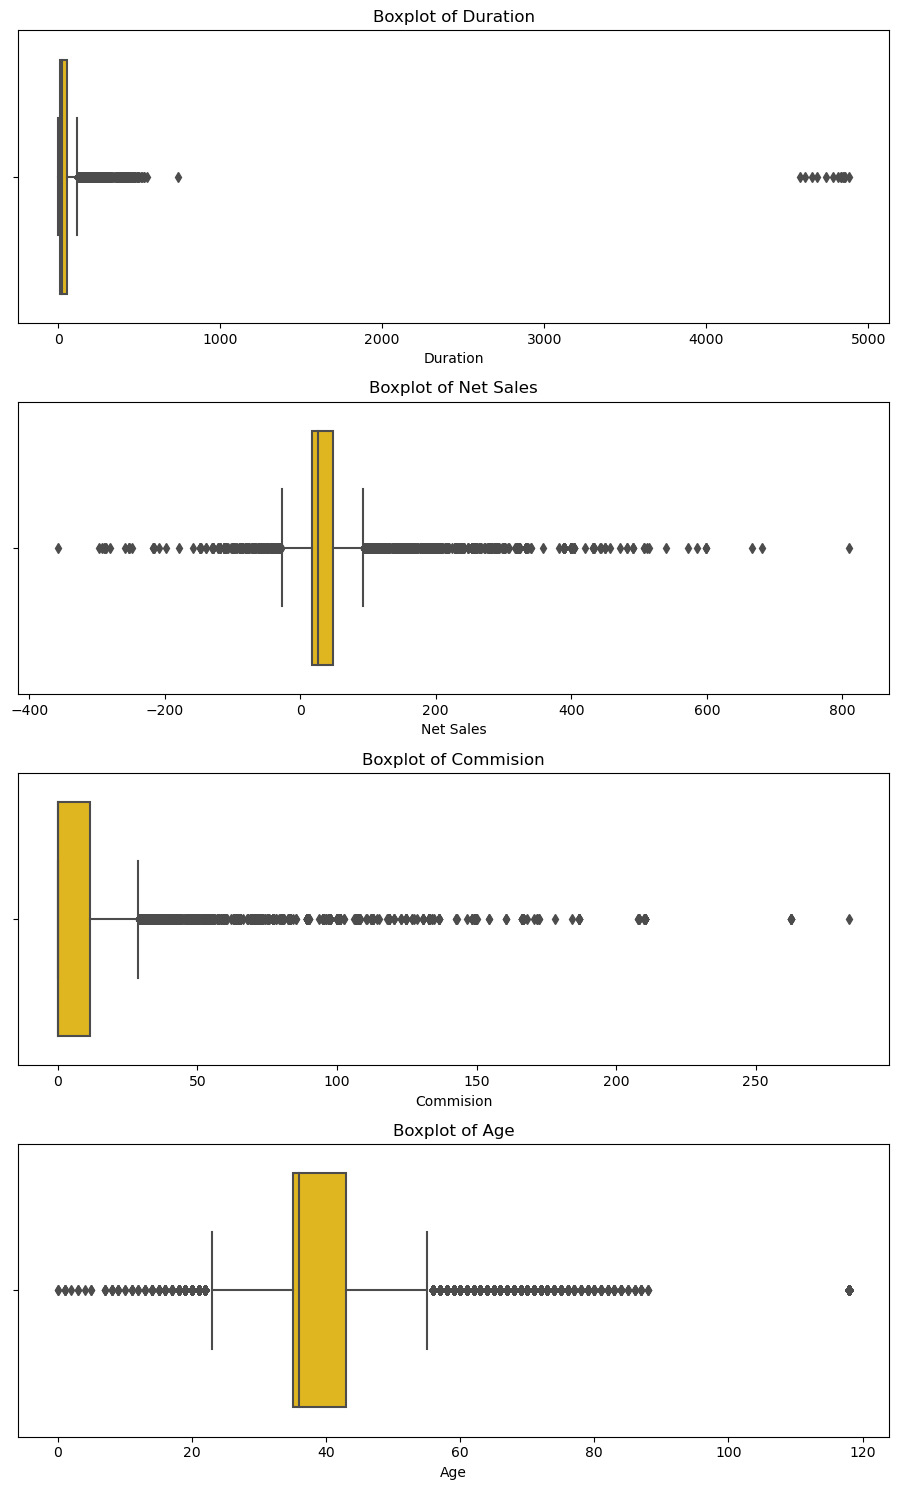

In [152]:
plt.figure(figsize=(18, 15))

for index, col in enumerate(numerical):
    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=data[col], color='#FFC700')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)


plt.tight_layout()
plt.show()

Dilihat dari grafik box plot diatas terdapat:
- Outlier pada upperbound pada feature `Duration` dan `Commision`
- Outlier pada lowerbound pada feature `Net Sales` dan `Age`

### 3.2 Categorical Variables

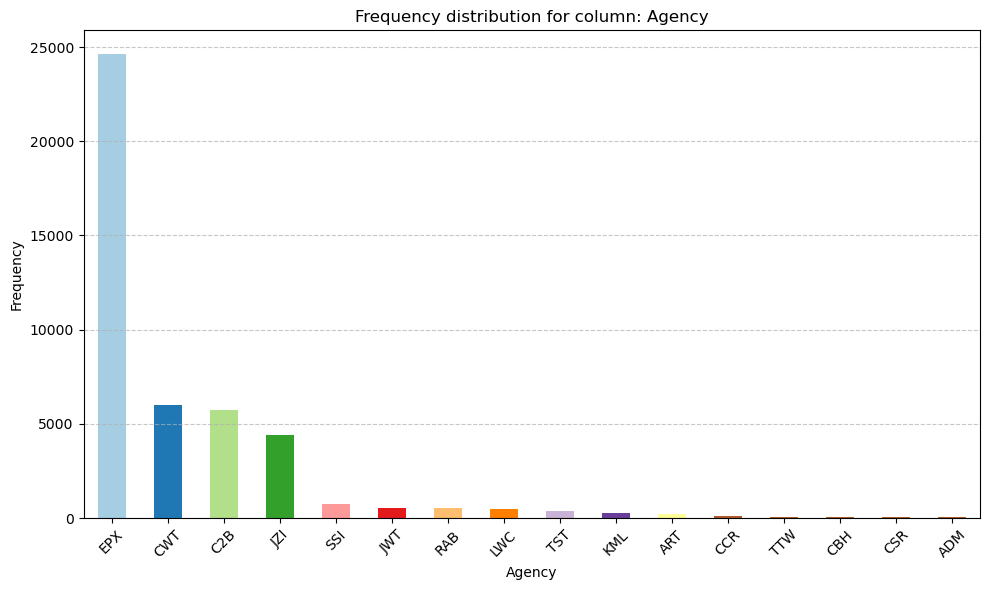

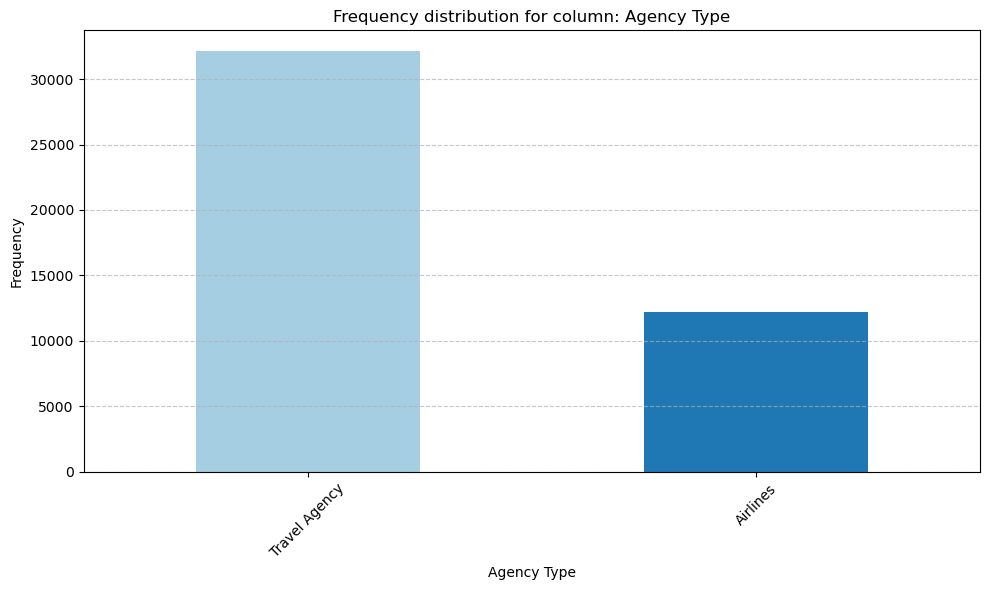

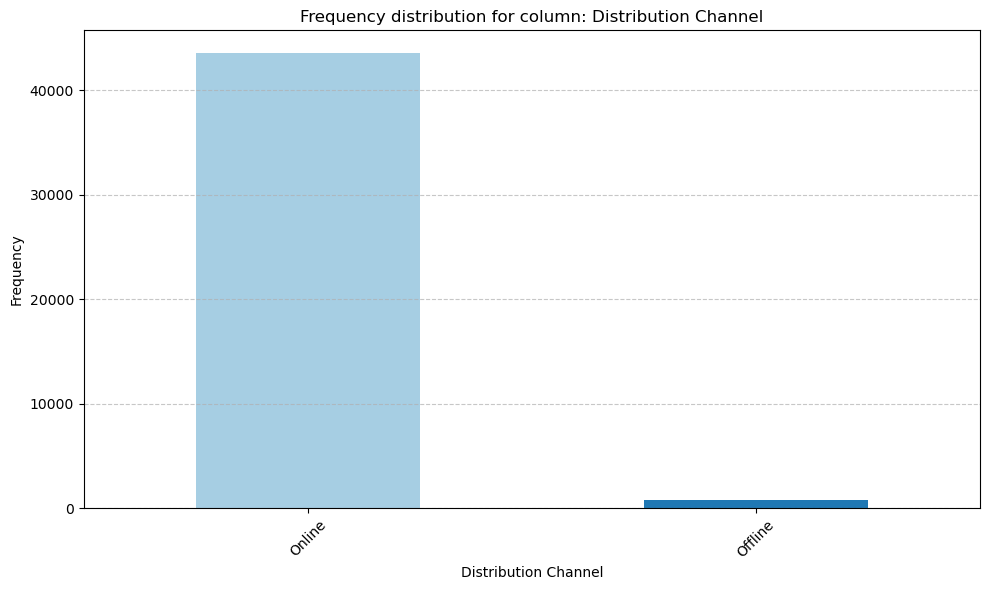

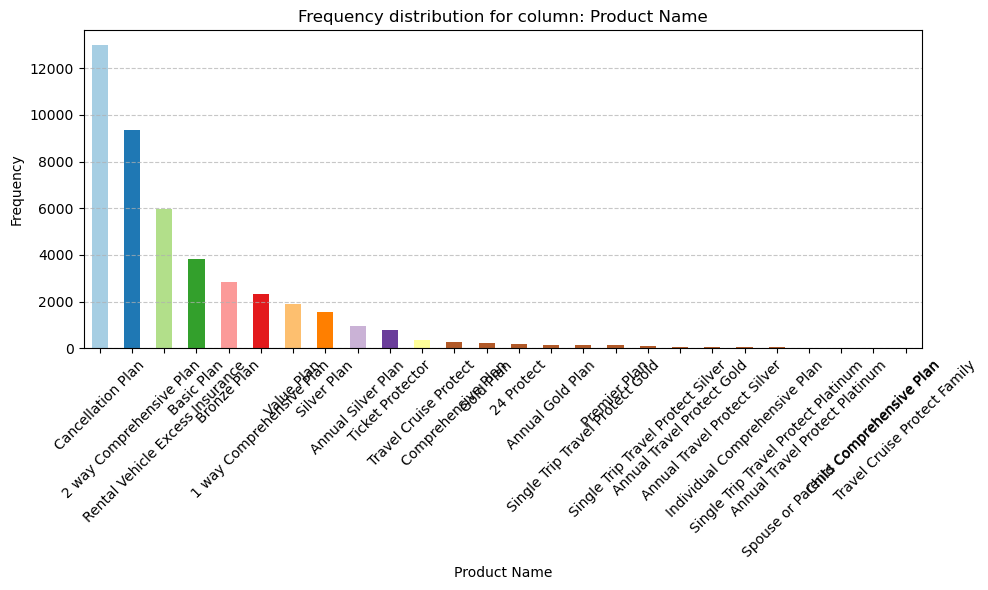

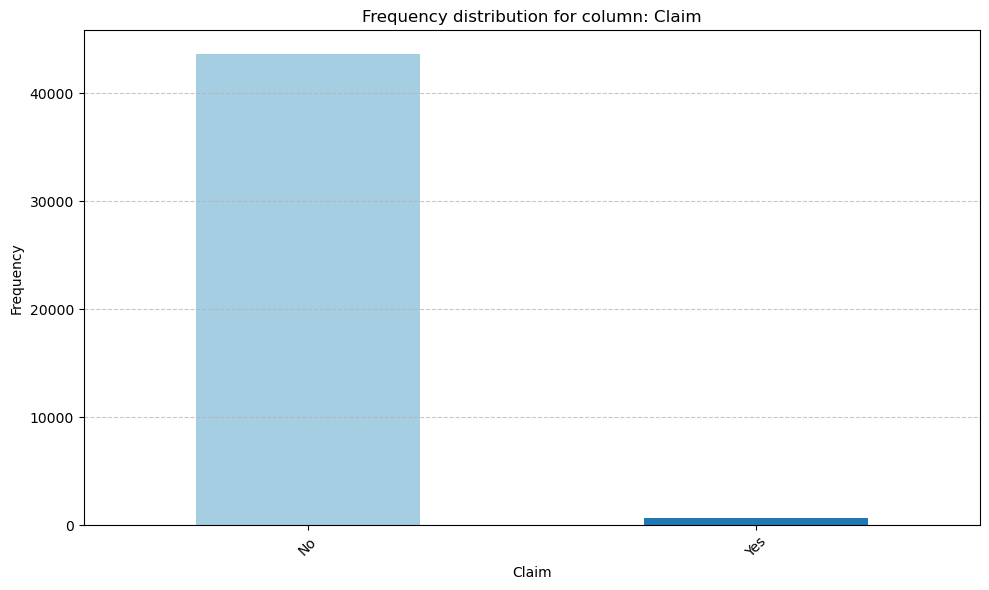

In [153]:
categorical_columns = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim']

# Calculate and plot frequency distribution for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    data[col].value_counts().plot(kind='bar', color=plt.cm.Paired(range(len(data[col].value_counts()))))
    plt.title(f'Frequency distribution for column: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Berikut ini adalah insight yang didapatkan dari grafik pada feature numerikal diatas:
1. `Agency` : Agen "EPX" adalah agen yang paling umum digunakan oleh pemegang polis.
Distribusi agen menunjukkan bahwa sebagian besar data berasal dari beberapa agen utama, dengan beberapa agen yang hanya memiliki sedikit transaksi.

2. `Agency Type` : Jenis agen `Travel Agency` mendominasi dalam dataset ini, menunjukkan bahwa sebagian besar penjualan asuransi perjalanan dilakukan melalui agen perjalanan daripada maskapai penerbangan.
Hal tersebut bisa menjadi indikasi bahwa agen perjalanan mungkin memiliki lebih banyak hubungan atau pengaruh dalam penjualan asuransi perjalanan.

3. `Distribution Channel`: Saluran distribusi `Online` sangat dominan dibandingkan "Offline". Menunjukkan bahwa mayoritas transaksi asuransi perjalanan dilakukan melalui platform online, yang mungkin karena kenyamanan dan aksesibilitas yang lebih tinggi.

4. `Product Name`: Produk "Cancellation Plan" adalah produk yang paling populer. Produk asuransi dengan fokus pada pembatalan perjalanan mungkin lebih diminati oleh pelanggan, mungkin karena fleksibilitas dan perlindungan ekstra yang ditawarkan.

5. `Claim`: Mayoritas data tidak mengajukan klaim, dengan jumlah klaim yang sangat sedikit. Ini menunjukkan ketidakseimbangan kelas yang signifikan dalam data, yang harus diperhatikan saat membangun model prediksi. Tingginya jumlah non-klaim mungkin juga mencerminkan bahwa banyak perjalanan yang berakhir tanpa insiden, atau adanya faktor lain yang mempengaruhi keputusan untuk mengajukan klaim.
Kesimpulan Umum
Ketidakseimbangan Kelas: Data klaim sangat tidak seimbang dengan dominasi besar pada kelas non-klaim. Ini memerlukan penanganan khusus saat membuat model prediksi.
Preferensi Pasar: Beberapa agen, saluran distribusi, dan produk sangat dominan, menunjukkan preferensi pasar yang jelas yang dapat dimanfaatkan untuk strategi pemasaran.


In [154]:
data['Destination'].value_counts().reset_index()

,Destination,count
0,SINGAPORE,9267
1,MALAYSIA,4139
2,THAILAND,4122
3,CHINA,3396
4,AUSTRALIA,2578
...,...,...
133,JAMAICA,1
134,ANGOLA,1
135,FRENCH POLYNESIA,1
136,NIGERIA,1


Pada feature `Destination`, Negara seperti "SINGAPORE", "THAILAND", dan "MALAYSIA" adalah tujuan paling umum.
Ini mungkin mencerminkan popularitas negara-negara ini sebagai destinasi wisata atau bisnis, dan menunjukkan pasar utama untuk asuransi perjalanan atau mungkin juga dapat diasumsikan bahwa dataset ini merupakan data yang didapatkan dari perusahaan asuransi perjalanan di Singapore atau negara di Asia Tenggara.

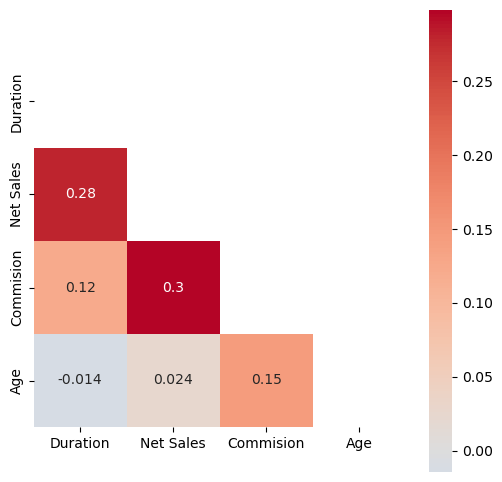

In [155]:
plt.figure(figsize=(6, 6))


matrix = np.triu(data[numerical].corr(method='spearman'))

sns.heatmap(data=data[numerical].corr(method='spearman'), annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

- `Duration` dan `Claim`: Korelasi antara durasi perjalanan dan `Claim` adalah -0.014, menunjukkan hubungan yang sangat lemah. Ini berarti durasi perjalanan tidak memiliki pengaruh yang signifikan terhadap klaim asuransi.

- `Net Sales` dan `Claim`: Terdapat korelasi positif moderat sebesar 0.32 antara `Net Sales` dan `Claim`. Ini menunjukkan bahwa polis dengan nilai penjualan yang lebih tinggi cenderung memiliki kemungkinan `Claim` yang lebih tinggi.

- `Commision` dan `Claim`: `Commision` yang diterima juga memiliki korelasi positif sebesar 0.26 dengan `Claim`. Hal ini bisa mengindikasikan bahwa produk yang menawarkan `Commision` lebih tinggi mungkin memiliki cakupan yang lebih luas atau lebih berisiko, sehingga lebih sering diklaim.

- Usia dan `Claim`: Korelasi antara usia dan `Claim` adalah 0.01, yang sangat rendah, menunjukkan bahwa usia tidak memiliki pengaruh yang berarti terhadap `Claim`.

## 4. `Data Cleaning`, `Feature Selection` and `Feature Engineering`	

Sekarang kita akan melakukan Data Cleaning terhadap dataset travel insurance ini, seperti missing value, data duplikat, atau menghapus feature yang tidak digunakan dalam membentuk model dan sebagainya.

### 4.1 Check Missing Values

In [156]:
data.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision                   0
Age                         0
Claim                       0
dtype: int64

In [157]:
data.isna().sum()/len(data)*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Gender                  71.392799
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision                0.000000
Age                      0.000000
Claim                    0.000000
dtype: float64

Berdasarkan Missing Valuenya terlihat bahwa 71% data pada feature `Gender` tidak ada. Data tersebut mungkin akan sulit diisi karena sudah melebihi 50% jumlah datanya yang hilang, sehingga feature `Gender` akan didrop dari data set ini

In [158]:
data.drop(['Gender'],axis=1, inplace=True)

In [159]:
data.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision               0
Age                     0
Claim                   0
dtype: int64

Setelah feature `Gender` di drop, maka sudah tidak ada missing value yang tersedia dalam dataset 

### 4.2 Check Data Duplicates

In [160]:
data.duplicated().sum()

5004

Terdapat 5004 data terduplikat pada dataset ini, sehingga data yang terduplikat tersebut akan didrop karena akan menyebabkan overfitting

In [161]:
data.drop_duplicates(inplace=True)

In [162]:
print(f'data terduplikasi {data.duplicated().sum()}')
print(f'jumlah data sekarang {data.shape}')

data terduplikasi 0
jumlah data sekarang (39324, 10)


Sekarang sudah tidak ada data terduplikat dalam dataset ini

### 4.3 Negative Value

In [163]:
for col in data[numerical]:
        print(f'Jumlah nilai dibawah 0 di feature {col}: {data[data[col]<0].value_counts().sum()}')

Jumlah nilai dibawah 0 di feature Duration: 2
Jumlah nilai dibawah 0 di feature Net Sales: 478
Jumlah nilai dibawah 0 di feature Commision: 0
Jumlah nilai dibawah 0 di feature Age: 0


Terlihat bahwa terdapat negative value dalam feature `Duration` dan `Net Sales`.

In [164]:
data[data['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
26228,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,No
26494,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,No


 Untuk feature `Duration` yang memiliki nilai negatif maka akan didrop barisnya karena tidak masuk akal memiliki durasi asuransi perjalanan yang bernilai negatif, selain itu juga ternyata ditemukan bahwa pada baris keduanya memiliki usia yang sangat tinggi yaitu 118 tahun, yang mungkin menjadi outlier dalam feature `Age`

In [165]:
data = data[data['Duration'] >= 0]

In [166]:
data[data['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim


Feature `Duration` yang memiliki nilai negatif sudah diatasi sehingga tidak ada lagi data negatif.

Selanjutnya untuk feature `Net Sales` kita akan abaikan yang memiliki nilai negatif, karena net sales negatif masih dapat dipertimbangkan apabila adanya diskon harga atau semacamnya

### 4.4 Generate New Features

Feature `Destination` memiliki nilai unique yang sangat banyak, sehingga feature tersebut akan diambil 15 nilai terbanyak saja agar mengurangi kardinalitasnya

In [172]:
# Hitung frekuensi kemunculan setiap destinasi
top_destinations = data['Destination'].value_counts().head(15).index

# Buat kolom baru yang menyebutkan 'Other Country' untuk destinasi yang tidak termasuk dalam 15 teratas
data['Destination'] = data['Destination'].apply(lambda x: x if x in top_destinations else 'Other Country')

# Cek hasilnya
print(data['Destination'].value_counts())

Destination
SINGAPORE                    8106
Other Country                5980
THAILAND                     3659
MALAYSIA                     3172
CHINA                        2931
AUSTRALIA                    2453
INDONESIA                    2029
UNITED STATES                1723
HONG KONG                    1570
PHILIPPINES                  1461
JAPAN                        1395
INDIA                        1228
KOREA, REPUBLIC OF           1003
VIET NAM                      997
UNITED KINGDOM                881
TAIWAN, PROVINCE OF CHINA     734
Name: count, dtype: int64


In [174]:
data['Destination'].unique()

array(['SINGAPORE', 'MALAYSIA', 'INDIA', 'UNITED STATES',
       'KOREA, REPUBLIC OF', 'THAILAND', 'Other Country', 'JAPAN',
       'INDONESIA', 'VIET NAM', 'AUSTRALIA', 'UNITED KINGDOM',
       'HONG KONG', 'CHINA', 'TAIWAN, PROVINCE OF CHINA', 'PHILIPPINES'],
      dtype=object)

Sekarang `Destination` hanya memiliki 15 nilai tertinggi dan sisanya dimasukkan kedalam nilai `other country`

#### 4.5 Removing Irrelevant Features

Feature yang didrop dalam penelitian ini adalah feature Gender karena datanya berisi nilai NaN yang sudah dihandling sebelumnya

### 4.6 Handling Outliers

In [176]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

numerical = [var for var in data.columns if data[var].dtypes != 'object']

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(data, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(data[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,Duration,3444,8.76,-58.00,126.0
1,Net Sales,3543,9.01,-27.50,96.5
2,Commision,4028,10.24,-17.82,29.7
3,Age,3739,9.51,21.50,57.5


Kita mengetahui bahwa distribusi dari feature numerikal tidak normal sebelumnya, sehingga disini kita mendapatkan outlier pada feature numerikal. pada feature `Duration` sebesar 8.76%, `Net Sales` memiliki outlier sebesar 9.01%, `Commision` sebesar 10.24% dan `Age` sebesar 9.51% data.

### 4.7 Collinearity

In [177]:
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.dropna(), i) for i in range(len(data.columns))]

    return vif.sort_values('VIF', ascending=False)

In [178]:
vif_df = calculate_vif(data[numerical])
dropped_columns = []

for i in range(len(vif_df)):
    if vif_df.iloc[0, -1] < 10:
        break
    else:
        dropped_columns.append(vif_df.iloc[0, 0])
        vif_df = calculate_vif(data[numerical].drop(columns=dropped_columns))

In [179]:
vif_df

,Feature,VIF
1,Net Sales,2.922175
2,Commision,2.131310
3,Age,1.658426
0,Duration,1.406062


In [180]:
dropped_columns

[]

Diketahui bahwa tidak ada kolinearitas pada feature numerikal pada dataset ini

### 4.8 Cardinality

In [181]:
categorical = [var for var in data.drop(columns='Claim').columns if data[var].dtypes == 'object']

In [182]:
# creating a function to check cardinality
def check_cardinality(data):
    for feature in categorical:
        cardinality = len(data[feature].unique())
        print(f"Cardinality of {feature}: {cardinality}")

        if cardinality > 10:
            print(f"Warning: High cardinality in {feature}.")

check_cardinality(data)

Cardinality of Agency: 16
Cardinality of Agency Type: 2
Cardinality of Distribution Channel: 2
Cardinality of Product Name: 26
Cardinality of Destination: 16


didapatkan bahwa feature `Agency`,`Product Name`, `Destination` memiliki kardinalitas yang tinggi dalam dataset ini sehingga kolom tersebut nanti akan dilakukan encoding menggunakan binary encoder

### 4.9 Imbalance Data

In [183]:
# Check the class distribution 
from collections import Counter

print("Class distribution:", Counter(data['Claim']))

Class distribution: Counter({'No': 38649, 'Yes': 673})


In [184]:
data['Claim'].value_counts(normalize=True)

Claim
No     0.982885
Yes    0.017115
Name: proportion, dtype: float64

Data dapat dikategorikan sebagai moderate imbalance

Untuk mensiasati hal tersebut nantinya kita dapat menguji apakah modelling perlu menerapkan metode resampling agar data kita memiliki distribusi kelas yang lebih seimbang atau tidak.

Adapun metode resampling yang akan dipakai adalah SMOTE

Menggunakan SMOTE untuk mengatasi data yang tidak seimbang adalah pendekatan yang valid dan efektif untuk meningkatkan kinerja model klasifikasi. SMOTE membantu meningkatkan representasi kelas minoritas, mengurangi risiko overfitting, memperbaiki distribusi kelas, dan pada akhirnya meningkatkan akurasi serta metrik evaluasi lainnya.

## 5. `Data Analysis	`

### 5.1. Numerical Variables vs Target

`Duration` vs `Claim`

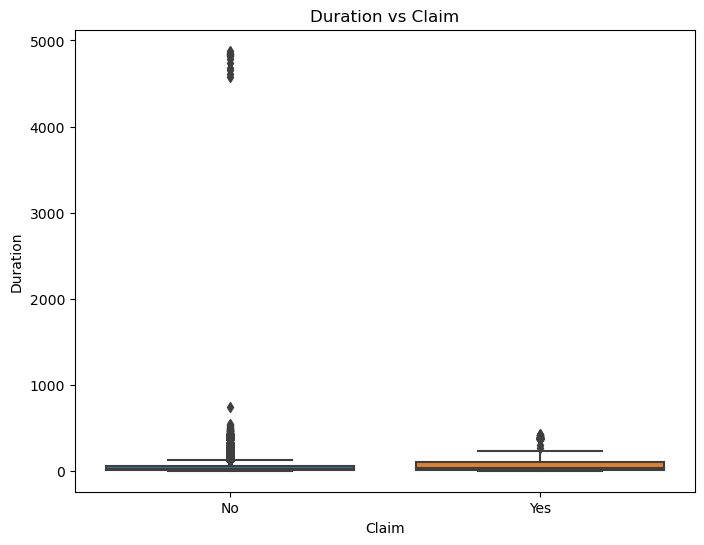

In [185]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Claim', y='Duration', data=data)
plt.title('Duration vs Claim')
plt.xlabel('Claim')
plt.ylabel('Duration')
plt.show()

Banyak klaim terjadi pada perjalanan dengan durasi pendek, menunjukkan bahwa klaim sering terkait dengan perjalanan singkat, meskipun ada klaim pada durasi menengah, perjalanannya dengan durasi panjang lebih jarang mengalami klaim.

`Net Sales` vs `Claim`

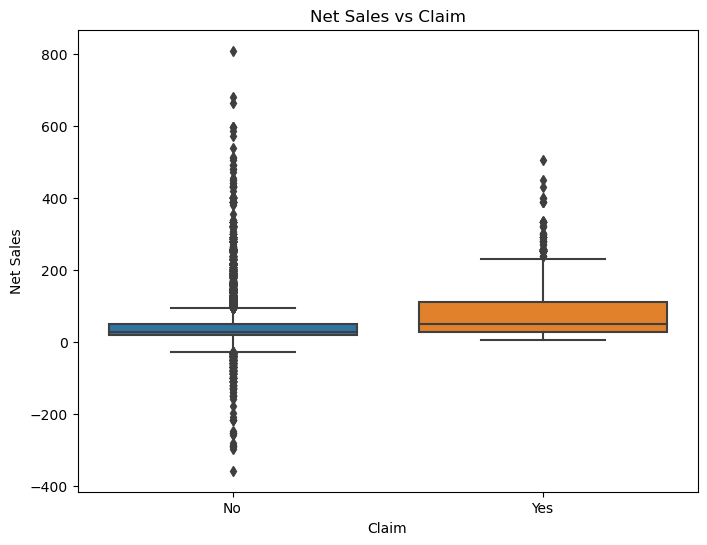

In [186]:
# Plot Net Sales vs Claim using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Claim', y='Net Sales', data=data)
plt.title('Net Sales vs Claim')
plt.xlabel('Claim')
plt.ylabel('Net Sales')
plt.show()


- Penjualan Tinggi: Ada korelasi positif antara nilai penjualan tinggi dan klaim. Klaim lebih sering terjadi pada penjualan dengan nilai menengah hingga tinggi.

- Penjualan Rendah: Penjualan dengan nilai rendah juga menunjukkan klaim, tetapi frekuensinya lebih sedikit dibandingkan dengan penjualan menengah hingga tinggi.

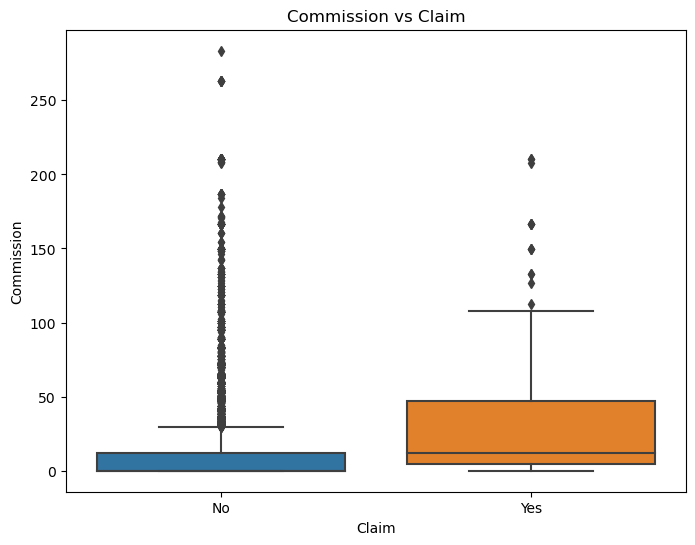

In [187]:
# Plot Commission vs Claim using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Claim', y='Commision', data=data)
plt.title('Commission vs Claim')
plt.xlabel('Claim')
plt.ylabel('Commission')
plt.show()


- Komisi Rendah: Klaim cenderung lebih banyak terjadi pada transaksi dengan komisi rendah. Ini mungkin menunjukkan bahwa transaksi dengan komisi rendah lebih rentan terhadap klaim.

- Komisi Tinggi: Transaksi dengan komisi tinggi lebih jarang mengalami klaim, mungkin karena lebih berhati-hati atau lebih baik dalam manajemen risiko.

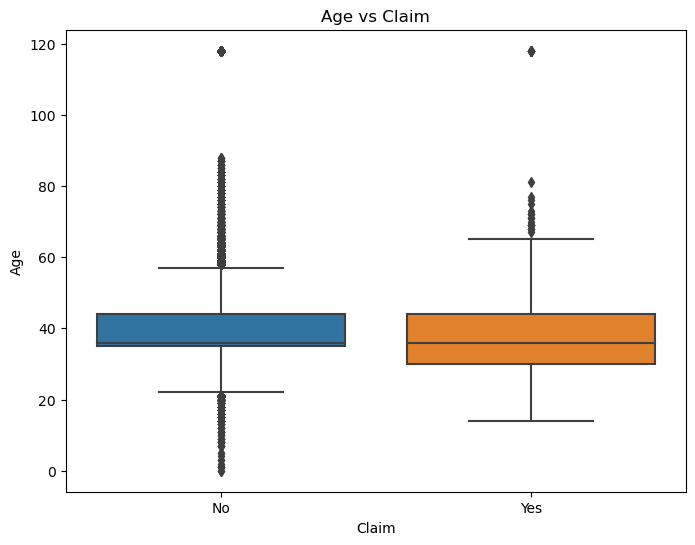

In [188]:

# Plot Age vs Claim using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Claim', y='Age', data=data)
plt.title('Age vs Claim')
plt.xlabel('Claim')
plt.ylabel('Age')
plt.show()

Berdasarkan boxplot diatas dapat dilihat bahwa usia sekitar 30-60 tahun menunjukkan frekuensi klaim yang lebih banyak. Kelompok usia ini mungkin lebih aktif dalam perjalanan dan lebih sering membeli asuransi. Usia di bawah 30 tahun dan di atas 60 tahun memiliki frekuensi klaim yang lebih rendah.

### 5.2. Categorical Variables vs Target

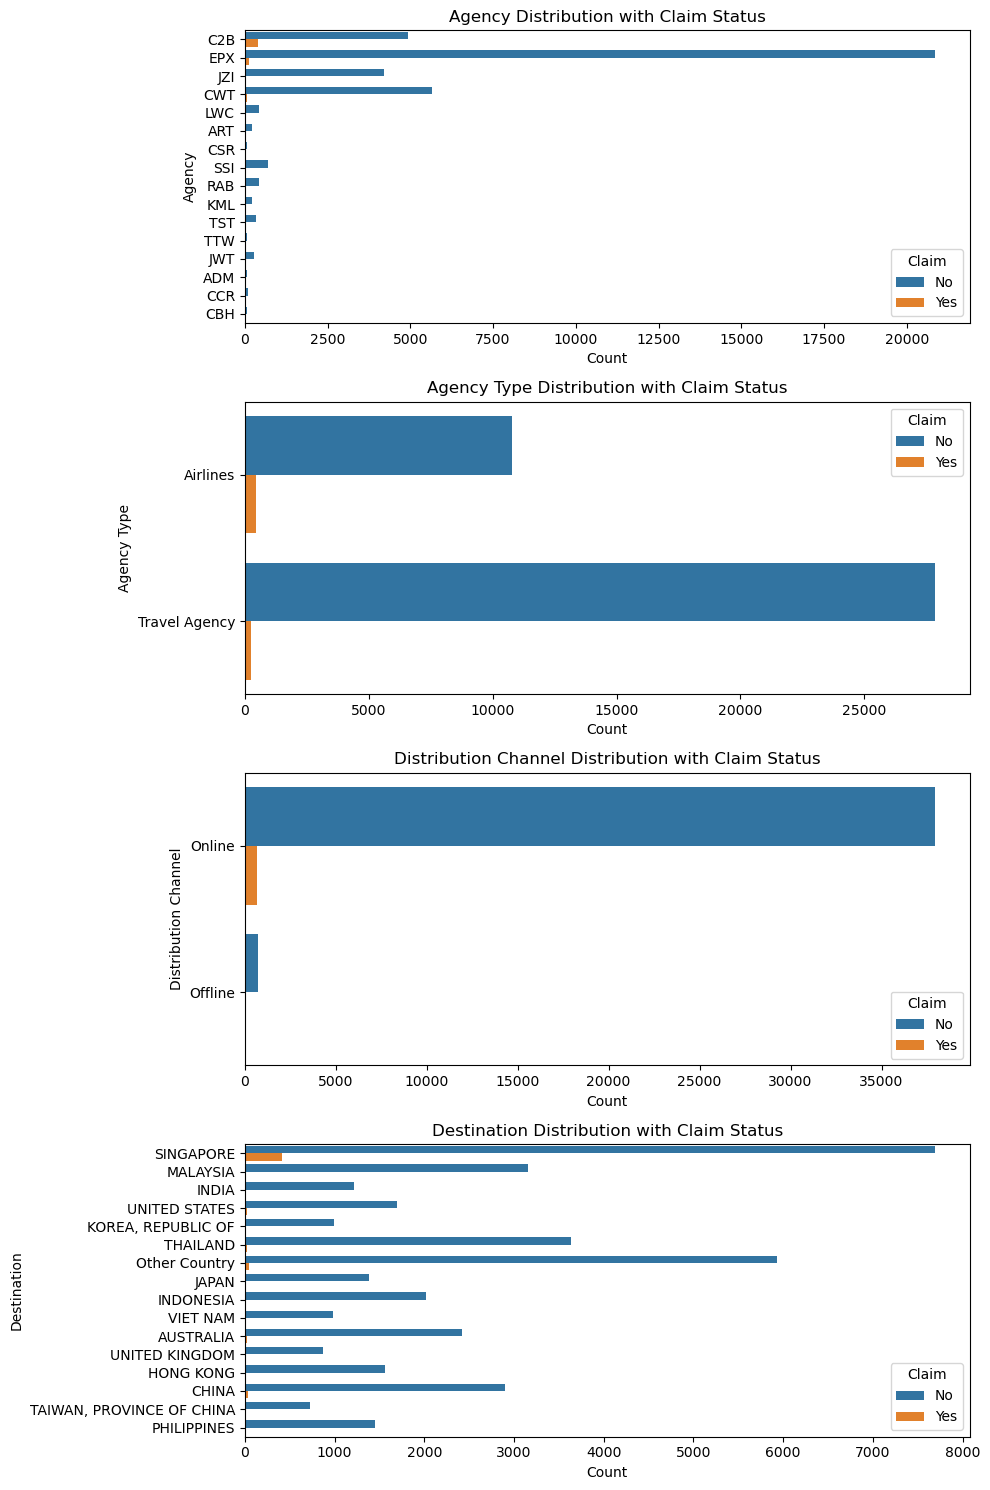

In [190]:
# Plotting distributions of categorical variables and their relationship with the Claim status
fig, axes = plt.subplots(4, 1, figsize=(10, 15))

# Countplot for 'Agency'
sns.countplot(data=data, y='Agency', hue='Claim', ax=axes[0])
axes[0].set_title('Agency Distribution with Claim Status')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Agency')

# Countplot for 'Agency Type'
sns.countplot(data=data, y='Agency Type', hue='Claim', ax=axes[1])
axes[1].set_title('Agency Type Distribution with Claim Status')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Agency Type')

# Countplot for 'Distribution Channel'
sns.countplot(data=data, y='Distribution Channel', hue='Claim', ax=axes[2])
axes[2].set_title('Distribution Channel Distribution with Claim Status')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Distribution Channel')


# Countplot for 'Destination'
sns.countplot(data=data, y='Destination', hue='Claim', ax=axes[3])
axes[3].set_title('Destination Distribution with Claim Status')
axes[3].set_xlabel('Count')
axes[3].set_ylabel('Destination')

plt.tight_layout()
plt.show()


1. Variasi Klaim Antar Agensi: Terdapat perbedaan signifikan dalam jumlah klaim di antara berbagai agen. Beberapa agen seperti 'C2B' dan 'EPX' menunjukkan jumlah klaim yang lebih tinggi. Agen seperti 'EPX' memiliki jumlah klaim yang hampir sama dengan jumlah non-klaim, menunjukkan potensi risiko yang lebih tinggi pada produk atau layanan mereka.

2. Variansi Klaim pada Tipe Agensi: Baik travel agency maupun Airlines menunjukkan proporsi klaim yang sangat kecil dibandingkan dengan jumlah total transaksi mereka tetapi travel agency memiliki lebih banyak klaim dibandingkan Airlines, namun proporsinya tetap kecil.

3. Variansi Klaim antar Channel Distribution: Baik pada online maupun offline, jumlah klaim sangat sedikit dibandingkan dengan non-klaim.
Saluran online memiliki jumlah klaim yang lebih banyak dibandingkan dengan offline, tetapi proporsinya tetap kecil.

4. Variansi Klaim antar Region: Singapore adalah destinasi tertinggi yang memiliki nilai klaim tertinggi, kemudian pada destinasi negara di other country memiliki klaim yang cukup banyak dibanding negara-negara yang memiliki frekuensi terbanyak


## 6. `Modelling`

### 6.1. Data Preparation

Sekarang mari kita melakukan fitur encoding untuk fitur2 categorical yang kita miliki.
Yang akan kita lakukan adalah :


1. Merubah fitur/kolom `Agency` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur yang terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/ kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.
2. Merubah fitur/kolom `Agency Type` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
3. Merubah fitur/kolom `Distribution Channel` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
4.  Merubah fitur/kolom `Product Name` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur yang terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/ kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.
5.  Merubah fitur/kolom `Destination` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal tetapi lebih dari 10 nilainya


In [191]:

# Column Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Agency Type', 'Distribution Channel']),
    ('binary', BinaryEncoder(),['Agency','Product Name','Destination'])
], remainder='passthrough')

In [192]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Agency Type', 'Distribution Channel']),
                                ('binary', BinaryEncoder(),
                                 ['Agency', 'Product Name', 'Destination'])])

Sekarang feature-feature kategorikal sudah diencoding menjadi kolom-kolom numerikal, dan yang tidak diencoding dimasukkan pada remainder

### 6.2. Define Features and Target

Kita akan membuat feature Claim menjadi kolom numerikal dengan nilai 'Yes' menjadi 1, dan 'No' menjadi 0, kemudian feature `Claim` menjadi target (y) dan sisanya tetap menjadi feature (X) 

In [193]:
data['Claim'] = np.where(data['Claim']=='Yes', 1, 0)

In [194]:
# Features
X = data.drop(columns='Claim')

# target
y = data['Claim']

Feature dan Target sudah dibagi menjadi X dan y 

### 6.3. Data Splitting

In [195]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2024, stratify=y
)

Sekarang kita sudah membagi data menjadi X_train, X_test, y_train, dan y_test. X_train dan y_train adalah data yang digunakan untuk proses pelatihan model dan X_test dan y_test digunakan untuk mengetes model. data test merupakan 20% data dari keseluruhan dataset awal

#### Handling Outlier with Winsorizing

In [196]:
def winsorize_with_pandas(s, limits):
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher'))

In [197]:
# Outlier Handling
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from scipy.stats.mstats import winsorize
from typing import Literal

class HandlingOutliers(BaseEstimator, TransformerMixin, OneToOneFeatureMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.feature_names_in_ = X.columns
        return self 
    
    def transform(self, X, y=None):
        data = X.copy()
        data['Age'] = pd.Series(winsorize_with_pandas(data['Age'], limits=(0.01, 0.01)))
        data['Duration'] = pd.Series(winsorize_with_pandas(data['Duration'], limits=(0.01, 0.01)))
        data['Net Sales'] = pd.Series(winsorize_with_pandas(data['Net Sales'], limits=(0.01, 0.01)))
        data['Commision'] = pd.Series(winsorize_with_pandas(data['Commision'], limits=(0.01, 0.01)))
        return data
    
    def set_output(self, transform: Literal['default', 'pandas']):
        return super().set_output(transform=transform)

Dengan menerapkan Windsorizing pada kolom-kolom yang memiliki outliers (Age, Duration, Net Sales, dan Commision), kita telah meningkatkan kualitas data yang digunakan untuk melatih model. Hasilnya mungkin model akan menjadi lebih stabil, akurat, dan mampu menggeneralisasi dengan lebih baik pada data baru. Windsorizing juga dapat membantu dalam membuat keputusan bisnis yang lebih baik dan berdasarkan data yang lebih representatif, mengurangi risiko pengambilan keputusan yang salah akibat pengaruh outliers.

**Scaling**

Kita akan menggunakan `Robust Scaler` karena data kita memiliki outlier dan Robust Scaler tidak akan terpengaruh oleh outlier. Kita dapat mengatur ulang scaler nantinya untuk mendapatkan scaler terbaik.

In [198]:
# Scaling
scaler = RobustScaler()

**Resampling**
Ketidakseimbangan kelas terjadi ketika satu kelas jauh lebih banyak dibandingkan kelas lain dalam kolom target, yang dapat menyebabkan model cenderung mengabaikan kelas minoritas. maka SMOTE digunakan untuk mengatasi ketidakseimbangan tersebut.

 SMOTE menghasilkan sampel sintetis dari kelas minoritas untuk mencapai keseimbangan antara jumlah sampel dari setiap kelas, sehingga model tidak bias terhadap kelas mayoritas

In [199]:
# Resampling
smote = SMOTE(random_state=2024)

#### `Pipeline`

| Technique | Action |
| ----------------------------- | ----------- |
| Handling Outlier | Menggunakan winsorize dengan limit 1% untuk kolom `Age`, `Duration`, `Net Sales`, dan `Commision` |
| One Hot Encoding | Transformasi kolom `Agency Type`, `Distribution Channel` yang jumlah nilai uniknya <= 10 |
| Binary Encoding | Transformasi kolom `Agency`, `Product Name`, dan `Destination` yang jumlah nilai uniknya > 10 |
| Robust Scaling | Transformasi skala dari tiap feature dengan menggunakan robust scaler |
| SMOTE | Resampling pada data train karena target imbalanced |

In [200]:
Pipeline([
    ('outlier', HandlingOutliers()),
    ('transformer', transformer),
    ('scaler', scaler),
    ('resampler', smote),
])

Pipeline(steps=[('outlier', HandlingOutliers()),
                ('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination'])])),
                ('scaler', RobustScaler()),
                ('resampler', SMOTE(random_state=2024))])

### 6.4. Model Benchmarking

In [201]:
# Define the models

# Logistic Regression
logreg = LogisticRegression(random_state=2024)

# KNeighbors Classifier
knn = KNeighborsClassifier()

# Decision Tree
tree = DecisionTreeClassifier(random_state=2024)

# RandomForest
rf = RandomForestClassifier(random_state=2024)

# Adaboost
adaboost = AdaBoostClassifier(random_state=2024)

# Gradientboost
gradboost = GradientBoostingClassifier(random_state=2024)

# ExtremeGradientBoost
xgboost = XGBClassifier(random_state=2024, verbosity=0)

Model yang akan digunakan adalah Logistic Regression, KNN Classifier, Decision Tree Classifier, Random Forest Classifier, Adaboost Classifier, Gradient Boost Classifier, dan XGBoost Classifier. Performa dari model-model tersebut akan di evaluasi menggunakan cross-validation untuk mencari model terbaik, kemudian proses ini membantu dalam memastikan bahwa model yang dipilih tidak hanya memiliki kinerja yang baik tetapi juga konsisten dalam berbagai fold cross-validation

In [202]:
# Pilihan model
models = [logreg, knn, tree, rf, adaboost,gradboost,xgboost]

roc_auc_mean = []
roc_auc_std = []
all_roc_auc = []
model_name = []

# Mencari model terbaik berdasarkan rerata roc_auc score terkecil dan std terkecil
for algoritma in models:

        model_pipe = Pipeline([
            ('outlier', HandlingOutliers()),
            ('preprocessing', transformer),
            ('scaler', scaler), 
            ('resampler', smote),
            ('model', algoritma)
        ])

        skfold = StratifiedKFold(n_splits = 5)

        model_cv = cross_val_score(
            model_pipe,                 # model yang sudah dimasukkan ke dalam pipeline
            X_train,                    # data sebelum di preprocessing
            y_train, 
            cv = skfold, 
            scoring = 'roc_auc',
            error_score='raise'
            )

        roc_auc_mean.append(model_cv.mean())
        roc_auc_std.append(model_cv.std())
        all_roc_auc.append(model_cv.round(4))
        model_name.append(algoritma.__class__.__name__)

In [203]:
# Perbandingan roc_auc score pada tiap algoritma
pd.DataFrame({
    'model': model_name,
    'mean': roc_auc_mean,
    'std': roc_auc_std,
    'all_score' : all_roc_auc
}).sort_values('mean',ascending=False)

,model,mean,std,all_score
0,LogisticRegression,0.806732,0.023814,"[0.8074, 0.8196, 0.7732, 0.8426, 0.7907]"
5,GradientBoostingClassifier,0.801139,0.013131,"[0.7953, 0.8109, 0.7856, 0.8215, 0.7924]"
4,AdaBoostClassifier,0.799833,0.025325,"[0.7995, 0.8211, 0.7607, 0.8319, 0.7859]"
6,XGBClassifier,0.759585,0.011800,"[0.755, 0.763, 0.7631, 0.7764, 0.7404]"
3,RandomForestClassifier,0.735154,0.020823,"[0.7663, 0.7296, 0.7474, 0.704, 0.7284]"
1,KNeighborsClassifier,0.683993,0.011265,"[0.7029, 0.6825, 0.6695, 0.6881, 0.677]"
2,DecisionTreeClassifier,0.546512,0.006774,"[0.5496, 0.5412, 0.5581, 0.5446, 0.5391]"


- Dari tujuh model yang dicoba, ternyata model Logistic Regression menghasilkan roc_auc score yang paling besar.
- Mari kita coba cek performa ketujuh model pada test set

*Predict Benchmark Model to Test Set*

In [204]:
list_roc_auc = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in models :
        model_pipe = Pipeline([
            ('outlier', HandlingOutliers()),
            ('preprocessing', transformer), 
            ('scaler', scaler), 
            ('resampler', smote),
            ('model', algoritma)
        ])

        # fitting
        model_pipe.fit(X_train, y_train)

        # predict
        y_pred = model_pipe.predict(X_test)

        # evaluate
        score = roc_auc_score(y_test, y_pred)
        list_roc_auc.append(score)

In [205]:
# Perbandingan performa antar model
pd.DataFrame({
    'model': model_name,
    'accuracy (test_set)': list_roc_auc
}).sort_values('accuracy (test_set)', ascending=False)

,model,accuracy (test_set)
0,LogisticRegression,0.747032
4,AdaBoostClassifier,0.738925
5,GradientBoostingClassifier,0.736076
6,XGBClassifier,0.618830
1,KNeighborsClassifier,0.595237
3,RandomForestClassifier,0.579673
2,DecisionTreeClassifier,0.527045


- Dari percobaan di atas, pada data test set model Logistic Regression menghasilkan roc_auc yang paling besar.
- Untuk selanjutnya, kita akan coba tuning pada 3 model tertinggi yaitu Logistic Regression, Gradient Boost, dan AdaBoost

### 6.5. Hyperparameter Tuning

#### Tuning Logistic Regression

Menggunakan hyperparameter tuning untuk Logistic Regression adalah langkah penting untuk mengoptimalkan kinerja model. Berikut adalah referensi yang mendukung penggunaan grid parameter yang telah Anda sebutkan:

Penjelasan dan Referensi Hyperparameter
Regularization Parameter (C):

Parameter C mengontrol kekuatan regularisasi. Regularisasi digunakan untuk mencegah overfitting dengan menambahkan penalti pada besar koefisien dalam model. Nilai C yang lebih kecil memberikan regularisasi yang lebih kuat.
nilai C umumnya diatur dalam rentang yang luas, seperti 0.001 hingga 100, untuk menemukan keseimbangan optimal antara bias dan varians.
Solver:

Solver menentukan algoritma yang digunakan untuk menemukan parameter optimal. Beberapa solver yang umum digunakan dalam Logistic Regression adalah liblinear, newton-cg, sag, dan lbfgs.
Dalam dokumentasi scikit-learn menyarankan bahwa solver seperti liblinear cocok untuk dataset kecil, sementara sag dan saga lebih cepat untuk dataset besar.

Referensi:

[MachineLearningMastery](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/)

[Scikit-learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [206]:
# hyperparameter yang akan diisikan pada model (logistic regression)
param_grid = {
    'model__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver':['liblinear','newton-cg', 'sag'],                                                         
} 

In [272]:
# model benchmark
logreg = LogisticRegression(random_state=2024)

# model dalam pipeline
logreg_pipeline = Pipeline([
    ('outlier', HandlingOutliers()),
    ('preprocessing', transformer), 
    ('scaler', scaler), 
    ('resampler', smote),
    ('model', logreg)
])

# Grid search (mencari hyperparameter terbaik)
tuned_logreg = GridSearchCV(
    estimator = logreg_pipeline,                
    param_grid = param_grid,                  
    cv = skfold,
    scoring = 'roc_auc',                    
    n_jobs= -1,
) 

# fit tuned_model pada train set
tuned_logreg.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('outlier', HandlingOutliers()),
                                       ('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['Agency',
                                                                          'Product '
                                                                          'Name',
                                                                          'Destination'])])),
                                       ('scaler', RobustScaler()),
                                       ('resampler', SMOTE(random_state=2024)),
                                       ('model',
                                        LogisticRegression(random_state=2024))]),
             n_jobs=-1,
             param_grid={'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'model__solver': ['liblinear', 'newton-cg', 'sag']},
             scoring='roc_auc')

In [274]:
# score terbaik hasil dari grid_search
print(f'roc auc Score pada train set: {tuned_logreg.best_score_:.3f}')

# hyperparameter pada score terbaik hasil dari tuned_logreg
print(f'Best parameter: {tuned_logreg.best_params_}')

roc auc Score pada train set: 0.810
Best parameter: {'model__C': 0.01, 'model__solver': 'sag'}


In [275]:
# Model setelah hyperparameter tuning
best_model_logreg = tuned_logreg.best_estimator_

# Fitting model
best_model_logreg.fit(X_train, y_train)

# Predict to test set
y_pred_best_logreg = best_model_logreg.predict(X_test)

# Evaluate roc auc score on test set
print(f'roc auc score pada test set: {roc_auc_score(y_test, y_pred_best_logreg):.3f}')

roc auc score pada test set: 0.753


#### TUNING GRADIENT BOOST

n_estimators (50-300):

Rentang ini digunakan untuk mengontrol jumlah pohon dalam ensemble. Jumlah pohon yang lebih besar dapat meningkatkan kinerja model, tetapi juga meningkatkan waktu komputasi. Friedman (2001) dalam "Greedy Function Approximation: A Gradient Boosting Machine" menunjukkan bahwa menambah jumlah pohon dapat meningkatkan akurasi hingga mencapai titik diminishing returns​ .

Scikit-learn dan sumber lainnya juga menyarankan menggunakan rentang yang luas untuk n_estimators selama tuning untuk menemukan keseimbangan yang tepat antara kinerja dan waktu komputasi​.

learning_rate (0.01-1.0):

Learning rate yang lebih rendah (0.01-0.1) umumnya digunakan untuk membuat model lebih stabil dan mengurangi risiko overfitting, dengan lebih banyak pohon. Dokumentasi scikit-learn merekomendasikan penggunaan nilai kecil seperti ini untuk mendapatkan hasil yang lebih stabil dan akurat​.

max_depth (1-5):

Kedalaman pohon mempengaruhi seberapa baik model menangkap pola dalam data. Kedalaman yang lebih besar dapat menyebabkan overfitting, sementara kedalaman yang lebih kecil membantu model untuk generalisasi lebih baik. Menurut panduan dari scikit-learn dan sumber lainnya, rentang 1-5 adalah pilihan yang umum dan baik untuk mulai tuning​ 
min_samples_split (2-6):

Parameter ini menentukan jumlah minimum sampel yang diperlukan untuk memisahkan node. Nilai yang lebih kecil memungkinkan lebih banyak pemisahan, yang dapat membantu dalam menangkap lebih banyak pola dalam data. Rentang ini didukung oleh rekomendasi scikit-learn untuk membantu mencegah overfitting dengan meminimalkan pemisahan pada dataset yang sangat kecil​


min_samples_leaf (1-5):

Jumlah minimum sampel yang diperlukan di leaf node. Rentang ini membantu mengontrol pertumbuhan pohon, memastikan bahwa pohon tidak tumbuh terlalu spesifik untuk data pelatihan. Praktik ini juga disarankan oleh banyak sumber untuk menjaga keseimbangan antara kompleksitas model dan generalisasi​​.
subsample (0.6-1.0):

Subsampling membantu mengurangi overfitting dengan menggunakan sebagian dari data untuk setiap pohon. Rentang 0.6-1.0 adalah rentang yang umum digunakan untuk memastikan bahwa setiap pohon dilatih pada subset data yang berbeda, sehingga meningkatkan robustitas model. Ini didukung oleh dokumentasi scikit-learn dan sumber lainnya yang menunjukkan bahwa subsampling dapat meningkatkan kinerja pada dataset besar​​.

max_features ('sqrt', 'log2', None):

Mengontrol jumlah fitur yang dipertimbangkan untuk setiap pemisahan. Menggunakan 'sqrt' atau 'log2' sering membantu mengurangi overfitting dengan membatasi jumlah fitur yang tersedia untuk setiap pohon, meningkatkan generalisasi model. Ini adalah praktik yang umum dalam literatur dan didukung oleh dokumentasi scikit-learn​.

[scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

<a href="https://machinelearningmastery.com/manually-optimize-hyperparameters/">Machinelearningmastery</a>

In [210]:
# Parameter distribution for RandomizedSearchCV
param_dist = {
    'model__n_estimators': np.arange(50, 300, step=50),
    'model__learning_rate': np.logspace(-2, 0, num=5),
    'model__max_depth': np.arange(1, 5, step=1),
    'model__min_samples_split': np.arange(2, 6, step=1),
    'model__min_samples_leaf': np.arange(1, 5, step=1),
    'model__subsample': np.linspace(0.6, 1.0, num=5),
    'model__max_features': ['sqrt', 'log2', None]
}

In [211]:


# Stratified cross validation
skf = StratifiedKFold(n_splits=3)  # Reduced number of splits for faster computation

# Model pipeline
gboost_pipeline = Pipeline([
    ('outlier', HandlingOutliers()),
    ('preprocessing', transformer), 
    ('resampler', smote),
    ('model', gradboost)
])

# Hyperparameter tuning
tuned_gboost = RandomizedSearchCV(
    estimator=gboost_pipeline, 
    param_distributions=param_dist, 
    cv=skf, 
    scoring='roc_auc', 
    n_jobs=-1, 
    random_state=0,
    n_iter=30
)

# Fit tuned_model on train set
tuned_gboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('outlier', HandlingOutliers()),
                                             ('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Desti...
                   param_distributions={'model__learning_rate': array([0.01      , 0.03162278, 0.1       , 0.31622777, 1.        ]),
                                        'model__max_depth': array([1, 2, 3, 4]),
                                        'model__max_features': ['sqrt', 'log2',
                                                                None],
                                        'model__min_samples_leaf': array([1, 2, 3, 4]),
                                        'model__min_samples_split': array([2, 3, 4, 5]),
                                        'model__n_estimators': array([ 50, 100, 150, 200, 250]),
                                        'model__subsample': array([0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=0, scoring='roc_auc')

In [212]:
# score terbaik hasil dari grid_search
print(f'roc auc Score pada train set: {tuned_gboost.best_score_:.3f}')

# hyperparameter pada score terbaik hasil dari tuned_gboost
print(f'Best parameter: {tuned_gboost.best_params_}')

roc auc Score pada train set: 0.807
Best parameter: {'model__subsample': 0.7, 'model__n_estimators': 250, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_features': None, 'model__max_depth': 2, 'model__learning_rate': 0.03162277660168379}


In [213]:
# Model setelah hyperparameter tuning
best_model_gboost = tuned_gboost.best_estimator_

# Fitting model
best_model_gboost.fit(X_train, y_train)

# Predict to test set
y_pred_best_gboost = best_model_gboost.predict(X_test)

# Evaluate roc auc score on test set
print(f'roc auc score pada test set: {roc_auc_score(y_test, y_pred_best_gboost):.3f}')

roc auc score pada test set: 0.729


#### TUNING ADABOOST


Untuk melakukan tuning pada model adaboost, Learning rate dipilih peneliti membatasi hyperparameter yang akan diuji yaitu untuk learning rate: [-2,2] (log-scale), berdasarkan dalam jurnal yang ditulis oleh Rijn dan Hutter (2018) yang memberikan hasil paling optimal
dan n estimators dimulai dengan 10 sampai 776 n estimators dipilih berdasarkan jurnal yang ditulis oleh Gao dan Liu (2018) yang memberikan hasil paling optimal.

In [214]:
# learning rate
learning_rate = [10**i for i in range(-2,2)]

# jumlah pohon
n_estimators = list(np.arange(10,776))

# algoritma untuk mencari AdaBoost terbaik
algorithm = ['SAMME', 'SAMME.R']

# Hyperparameter space Adaboost
param_adaboost = {
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__algorithm':algorithm
    }

In [215]:
# model benchmark 2
adaboost = AdaBoostClassifier(random_state=2024) 

# Stratified cross validation
skf = StratifiedKFold(n_splits = 3)


# model dalam pipeline
adaboost_pipeline = Pipeline([
    ('outlier', HandlingOutliers()),
    ('preprocessing', transformer), 
    ('resampler', smote),
    ('model', adaboost)
])

 # Hyperparameter tuning
tuned_adaboost = RandomizedSearchCV(
    estimator=adaboost_pipeline, 
    param_distributions = param_adaboost, 
    cv = skf, 
    scoring = 'roc_auc', 
    n_jobs = -1, 
    random_state=0,
    n_iter=30
)

# fit tuned_model pada train set
tuned_adaboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('outlier', HandlingOutliers()),
                                             ('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Desti...
                                             ('resampler',
                                              SMOTE(random_state=2024)),
                                             ('model',
                                              AdaBoostClassifier(random_state=2024))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'model__algorithm': ['SAMME',
                                                             'SAMME.R'],
                                        'model__learning_rate': [0.01, 0.1, 1,
                                                                 10],
                                        'model__n_estimators': [10, 11, 12, 13,
                                                                14, 15, 16, 17,
                                                                18, 19, 20, 21,
                                                                22, 23, 24, 25,
                                                                26, 27, 28, 29,
                                                                30, 31, 32, 33,
                                                                34, 35, 36, 37,
                                                                38, 39, ...]},
                   random_state=0, scoring='roc_auc')

In [216]:
# score terbaik hasil dari grid_search
print(f'ROC AUC Score pada train set: {tuned_adaboost.best_score_:.3f}')

# hyperparameter pada score terbaik hasil dari tuned_adaboost
print(f'Best parameter: {tuned_adaboost.best_params_}')

ROC AUC Score pada train set: 0.808
Best parameter: {'model__n_estimators': 131, 'model__learning_rate': 1, 'model__algorithm': 'SAMME'}


In [217]:
# Model setelah hyperparameter tuning
best_ada = tuned_adaboost.best_estimator_

# Fitting ada_rus
best_ada.fit(X_train, y_train)

# Predict to test set
y_pred_best_ada = best_ada.predict(X_test)

# Evaluate roc auc score on test set
print(f'roc_auc score pada test set: {roc_auc_score(y_test, y_pred_best_ada):.3f}')

roc_auc score pada test set: 0.730


| Score Model | Train Set | Test Set |
| --- | --- | --- |
| Logistic Regression Before Tuning | 0.806 | 0.747 |
| Logistic Regression After Tuning | 0.810 | 0.753 |
| Gradient Boost Before Tuning | 0.801 | 0.736 |
| Gradient Boost After Tuning | 0.807 | 0.729 |
| Adaboost Before Tuning |  0.799 | 0.738 |
| Adaboost After Tuning | 0.808 | 0.730 |



In [276]:
models = ['Logistic Regression', 'Gradient Boost', 'Ada Boost' ]
train_before = [0.806, 0.801, 0.799]
train_after = [0.810, 0.807,0.808] 
test_before = [0.747, 0.736, 0.738] 
test_after = [0.753, 0.729, 0.730]  

#### Tuning Result Before and After

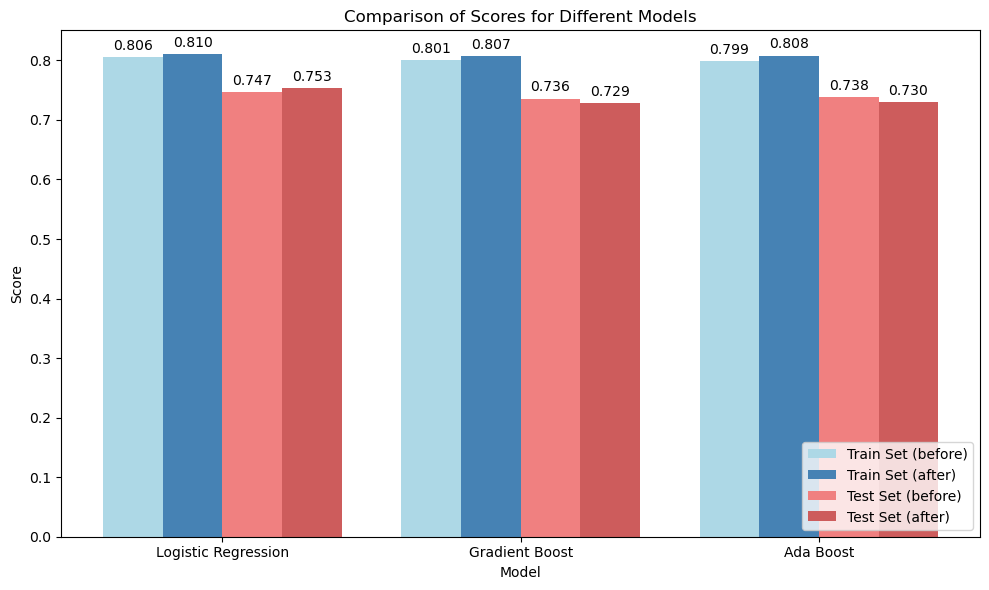

In [277]:
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width*1.5, train_before, width, label='Train Set (before)', color='lightblue')
bars2 = ax.bar(x - width*0.5, train_after, width, label='Train Set (after)', color='steelblue')
bars3 = ax.bar(x + width*0.5, test_before, width, label='Test Set (before)', color='lightcoral')
bars4 = ax.bar(x + width*1.5, test_after, width, label='Test Set (after)', color='indianred')


ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Comparison of Scores for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='lower right')

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('%.3f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)
autolabel(bars4)

fig.tight_layout()
plt.show()


Dilihat dari grafik barplot diatas didapatkan bahwa:

1. Logistic Regression:

- Train Set (before tuning): Skor 0.806
- Train Set (after tuning): Skor 0.810
- Test Set (before tuning): Skor 0.747
- Test Set (after tuning): Skor 0.753

Logistic Regression menunjukkan peningkatan kecil pada skor baik pada data train maupun data test setelah tuning. Ini menunjukkan bahwa tuning membantu model untuk sedikit lebih baik dalam generalisasi.

2. Gradient Boosting:

- Train Set (before tuning): Skor 0.801
- Train Set (after tuning): Skor 0.807
- Test Set (before tuning): Skor 0.736
- Test Set (after tuning): Skor 0.729

Gradient Boosting menunjukkan peningkatan pada data train tetapi sedikit penurunan pada data test setelah tuning. Hal ini mungkin menunjukkan overfitting setelah tuning, di mana model menjadi terlalu cocok dengan data train tetapi kinerja pada data test menurun.

3. AdaBoost:

- Train Set (before tuning): Skor 0.799
- Train Set (after tuning): Skor 0.808
- Test Set (before tuning): Skor 0.738
- Test Set (after tuning): Skor 0.730

AdaBoost menunjukkan peningkatan pada data train dan sedikit penurunan pada data test setelah tuning. Mirip dengan Gradient Boosting, hal ini juga menunjukkan potensi overfitting setelah tuning.

In [278]:

best_model_logreg.fit(X_train, y_train)
y_pred_best_logreg = best_model_logreg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_best_logreg))


best_model_gboost.fit(X_train, y_train)
y_pred_best_gboost = best_model_gboost.predict(X_test)
print("Gradienboost Classification Report:")
print(classification_report(y_test, y_pred_best_gboost))

best_ada.fit(X_train, y_train)
y_pred_ada = best_ada.predict(X_test)
print("Adaboost Classification Report:")
print(classification_report(y_test, y_pred_ada))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      7730
           1       0.06      0.70      0.11       135

    accuracy                           0.81      7865
   macro avg       0.53      0.75      0.50      7865
weighted avg       0.98      0.81      0.88      7865

Gradienboost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      7730
           1       0.08      0.57      0.14       135

    accuracy                           0.88      7865
   macro avg       0.54      0.73      0.54      7865
weighted avg       0.98      0.88      0.92      7865

Adaboost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      7730
           1       0.08      0.59      0.13       135

    accuracy                           0.87      7865
   macro avg     

- Logistic Regression memiliki skor stabil dan sedikit peningkatan setelah tuning.
- Gradient Boosting menunjukkan penurunan performa setelah tuning pada data uji, yang menunjukkan potensi overfitting.
- AdaBoost juga menunjukkan sedikit penurunan performa setelah tuning pada data uji.

Akurasi Keseluruhan:

- Gradient Boosting memiliki akurasi keseluruhan tertinggi (0.88), diikuti oleh AdaBoost (0.87), dan Logistic Regression (0.81).
Kinerja pada Kelas Minoritas (Klaim):

- Recall untuk kelas 1 (klaim) tertinggi pada Logistic Regression (0.70), diikuti oleh AdaBoost (0.59), dan terendah pada Gradient Boosting (0.57).

- Precision untuk kelas 1 (klaim) adalah yang tertinggi pada Gradient Boosting (0.08) dan AdaBoost (0.08), sedangkan Logistic Regression memiliki precision terendah (0.06).
Macro Average:

- Macro average recall tertinggi pada Logistic Regression (0.75), menunjukkan model ini lebih baik dalam mendeteksi kedua kelas secara seimbang.

Berdasarkan analisis di atas, Logistic Regression adalah model terbaik untuk dataset ini karena memiliki recall tertinggi untuk kelas klaim (0.70) dan macro average recall tertinggi (0.75). Meskipun akurasi keseluruhan lebih rendah, kemampuannya untuk mendeteksi klaim yang benar lebih baik daripada model lainnya, yang sangat penting dalam konteks asuransi perjalanan.

Berdasarkan grafik perbanginan sebelumnya, Gradient Boosting dan Adaboost menunjukkan tanda-tanda overfitting. Maka yang akan dipilih menjadi model untuk prediksi machine learning dataset ini adalah **Logistic Regression**



Best parameter dari Logistic Regression: {'model__C': 0.01, 'model__solver': 'sag'}

In [279]:
final_model = best_model_logreg

### 6.6. Learning Curve

In [280]:
y_proba = final_model.predict_proba(X_test)[:,1]

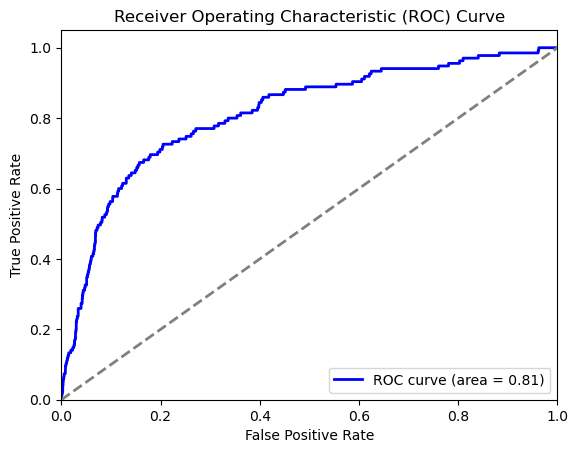

In [281]:
roc_auc_ada = roc_auc_score(y_test, y_proba)

# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

- Nilai AUC sebesar 0.81 menunjukkan bahwa model memiliki kinerja yang baik dalam membedakan antara kelas positif dan negatif. AUC yang mendekati 1 menunjukkan model yang sangat baik, sementara AUC yang mendekati 0.5 menunjukkan model yang tidak lebih baik dari tebak-tebakan acak.

- Kurva ROC yang mendekati sudut kiri atas grafik menunjukkan model yang memiliki True Positive Rate tinggi dan False Positive Rate rendah, yang ideal untuk model klasifikasi.



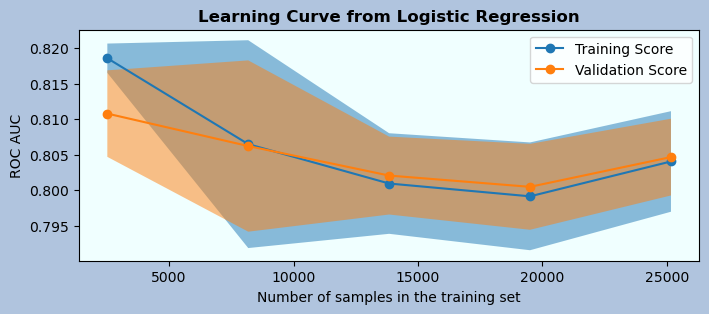

In [282]:
from sklearn.model_selection import LearningCurveDisplay

# Set figure size
fig, ax = plt.subplots(figsize=(8, 3))

# Set the required parameters
common_params={
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 5),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
    "score_name": 'roc_auc'
}

# Generate learning curve plot
LearningCurveDisplay.from_estimator(final_model, **common_params, ax=ax)

# Set title and legend
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='upper right')
ax.set_title(f'Learning Curve from Logistic Regression', fontweight='bold')
ax.set_ylabel('ROC AUC')

# Show the plot
plt.gca().set_facecolor('azure')
plt.gcf().set_facecolor('lightsteelblue')
plt.show()

Berdasarkan grafik learning curve diatas didapatkan bahwa :
- Pada awal grafik, ada sedikit indikasi overfitting karena skor pelatihan lebih tinggi daripada skor validasi.
- Seiring bertambahnya jumlah sampel, gap antara skor pelatihan dan validasi mengecil, yang menunjukkan bahwa model menjadi lebih generalis dan sesuai untuk data baru.
- Model Logistic Regression ini menunjukkan performa yang cukup stabil dan baik pada dataset yang besar. Penurunan skor pelatihan yang stabil dan skor validasi yang konstan menunjukkan bahwa model ini mampu menangani peningkatan kompleksitas tanpa mengalami overfitting yang signifikan.
Pada jumlah sampel yang besar, model mencapai titik keseimbangan di mana ia mempelajari pola-pola yang relevan tanpa terlalu cocok dengan data pelatihan, yang merupakan tanda dari model yang baik dan generalis.

### 6.7. Explanation about Best Model Algorithm

Logistic Regression adalah metode statistik yang digunakan untuk analisis regresi di mana hasilnya adalah variabel biner (dengan dua kemungkinan hasil seperti 0 dan 1, sukses dan gagal, ya dan tidak). Model ini digunakan untuk memprediksi probabilitas suatu kejadian dengan menggunakan satu atau lebih variabel independen (prediktor). Berikut adalah penjelasan rinci tentang proses Logistic Regression:

Langkah-langkah Proses Logistic Regression
Formulasi Model:

Logistic Regression menggunakan fungsi logit (logistic) untuk memodelkan hubungan antara variabel dependen biner (Y) dan satu atau lebih variabel independen (X). Fungsi logit mengubah probabilitas suatu kejadian menjadi log-odds, yang merupakan logaritma dari odds (peluang) kejadian tersebut terjadi.
Estimasi Koefisien:

Koefisien regresi (β) diestimasi menggunakan metode Maximum Likelihood Estimation (MLE). MLE mencari nilai koefisien yang memaksimalkan fungsi likelihood, yaitu kemungkinan bahwa model yang diusulkan mengamati data yang ada.
Fungsi Sigmoid:

Untuk mengubah log-odds kembali menjadi probabilitas, Logistic Regression menggunakan fungsi sigmoid. Fungsi sigmoid memetakan nilai prediksi menjadi rentang antara 0 dan 1, yang dapat diinterpretasikan sebagai probabilitas.
Prediksi:

Setelah model dilatih, prediksi dilakukan dengan menghitung probabilitas kejadian menggunakan fungsi sigmoid. Jika probabilitas lebih besar dari 0.5, model memprediksi bahwa kejadian tersebut akan terjadi (1); jika kurang dari 0.5, model memprediksi tidak akan terjadi (0).
Evaluasi Model:

Kinerja model dievaluasi menggunakan metrik seperti Akurasi, Precision, Recall, F1-Score, dan ROC-AUC. Confusion matrix juga digunakan untuk memahami jumlah prediksi benar dan salah untuk masing-masing kelas.

[Scikit-learn Documentation on Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

### 6.8. Feature Importances

In [283]:
# Mendapatkan feature_importance
model = best_model_logreg.named_steps['model']
feature_names = best_model_logreg.named_steps['preprocessing'].get_feature_names_out()
feature_importances = model.coef_[0]

# Membuat DataFrame untuk pentingnya fitur
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importances': feature_importances
}).sort_values(by='Importances', ascending=False)


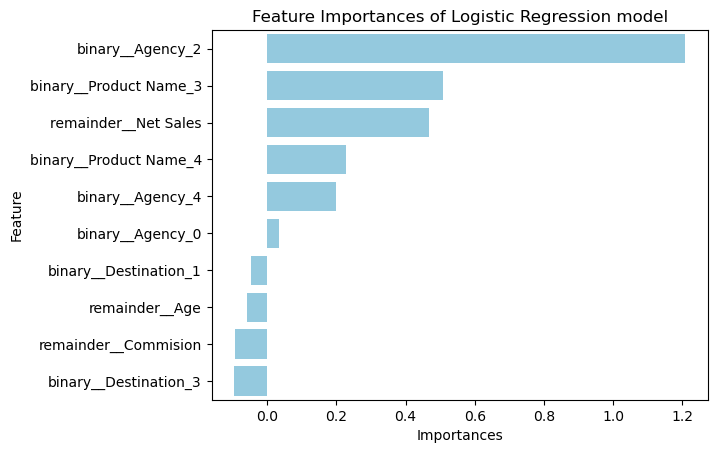

In [284]:
plt.title('Feature Importances of Logistic Regression model')
sns.barplot(data=feature_importance_df.head(10), x='Importances', y='Feature', color='skyblue')
plt.show()

Berdasarkan Feature importances pada grafik diatas diketahui bahwa:

- binary__Agency_2: Fitur ini memiliki koefisien paling tinggi, menunjukkan bahwa jika polis dibeli dari Agency_2, ada peningkatan signifikan dalam probabilitas mengajukan klaim

- binary__Product Name_3: Produk asuransi ini juga sangat berpengaruh pada target

- remainder__Net Sales: Nilai penjualan bersih memiliki pengaruh sekitar 0.5 dalam menentukan klaim.

- binary__Product Name_4 dan binary__Agency_4: Kedua fitur ini memiliki pengaruh penting, meskipun tidak sebesar Agency_2 atau Product Name_3. Ini menunjukkan bahwa produk dan agen ini juga terkait dengan peningkatan kemungkinan klaim, meskipun dalam skala yang lebih kecil.

- binary__Agency_0: Fitur ini menunjukkan pengaruh yang lebih kecil, tetapi tetap relevan dalam prediksi klaim.

- Fitur seperti binary__Destination_1, remainder__Commision, remainder__Age, dan binary__Destination_3 memiliki koefisien yang sangat kecil, menunjukkan bahwa faktor-faktor ini memiliki pengaruh yang minimal terhadap prediksi klaim.


### 6.8. Confusion Matrix

#### Before Tuning

In [302]:
estimator = Pipeline([
    ('outlier', HandlingOutliers()),
    ('preprocessing', transformer), 
    ('scaler', scaler), 
    ('resampler', smote),
    ('model', logreg)
])
    
estimator.fit(X_train,y_train)
y_pred_test = estimator.predict(X_test)
y_pred_train = estimator.predict(X_train)
print('Train score sebelum tuning:',roc_auc_score(y_train,y_pred_train))
print('Test score sebelum tuning:',roc_auc_score(y_test,y_pred_test))

Train score sebelum tuning: 0.7565839678709606
Test score sebelum tuning: 0.7470317665660485


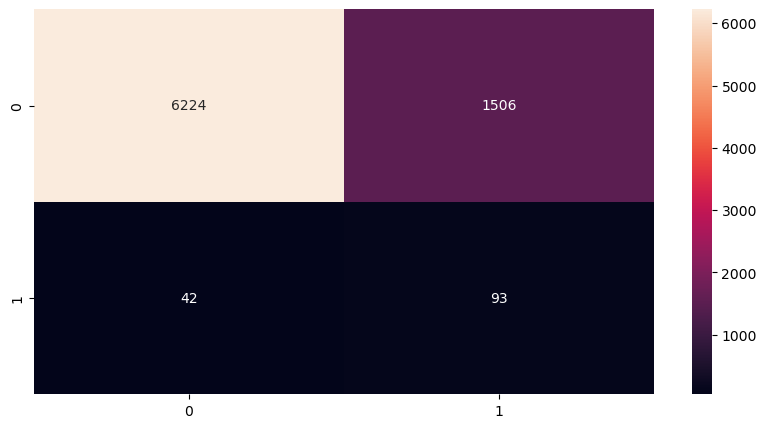

In [291]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt=".0f")
plt.show()

In [303]:
# score
print('Recall:', recall_score(y_test, y_pred_test))
print('Precision:', precision_score(y_test, y_pred_test))
print('ROC:', roc_auc_score(y_test, y_pred_test))
print('Accuracy:', balanced_accuracy_score(y_test, y_pred_test))

Recall: 0.6888888888888889
Precision: 0.058161350844277676
ROC: 0.7470317665660485
Accuracy: 0.7470317665660486


#### After Tuning

In [293]:
final_model.fit(X_train, y_train)
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

print('Train score setelah tuning:',roc_auc_score(y_train,y_pred_train))
print('Test score setelah tuning:',roc_auc_score(y_test,y_pred_test))

Train score setelah tuning: 0.7590581746693693
Test score setelah tuning: 0.7528053279670355


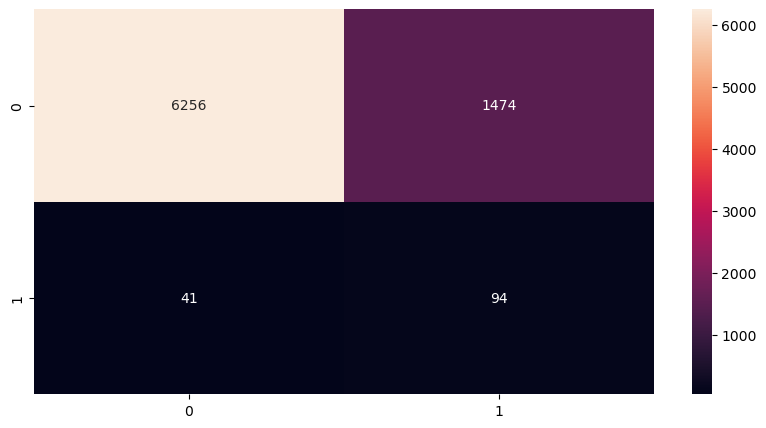

In [294]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt=".0f")
plt.show()

In [ ]:
# score
print('Recall:', recall_score(y_test, y_pred_test))
print('Precision:', precision_score(y_test, y_pred_test))
print('ROC:', roc_auc_score(y_test, y_pred_test))
print('Accuracy:', balanced_accuracy_score(y_test, y_pred_test))

Recall: 0.7037037037037037
Precision: 0.0682961897915169
ROC: 0.7680226151118777
Accuracy: 0.7680226151118777


Berdasarkan hasil perbandingan sebelum dan sesudah tuning didapati sebagai berikut:

- Recall:
    - Sebelum Tuning: 68.8%
    - Sesudah Tuning: 70.3%

Recall meningkat dari 68.8% menjadi 70.3%. Ini menunjukkan bahwa model setelah tuning lebih baik dalam mendeteksi klaim yang benar, mengurangi false negatives dari 42 menjadi 41.

- Precision:
    - Sebelum Tuning: 5.8%
    - Sesudah Tuning: 6.8%

Precision meningkat sedikit dari 5.8% menjadi 6.8%. Meskipun peningkatan ini kecil, ini menunjukkan bahwa model setelah tuning memiliki sedikit lebih banyak prediksi positif yang benar.

- False Negatives (FN):
    - Sebelum Tuning: 42
    - Sesudah Tuning: 41

Jumlah false negatives berkurang dari 42 menjadi 40. Ini menunjukkan bahwa tuning membantu model untuk mendeteksi lebih banyak klaim yang sebenarnya terjadi.

- Accuracy:
    - Sebelum Tuning: 74.7%
    - Sesudah Tuning: 76.8%

Accuracy juga meningkat dari 74.2% menjadi 76.8%, menunjukkan peningkatan kinerja model secara keseluruhan.

- ROC AUC:

Sebelum Tuning: 74.7%
Sesudah Tuning: 76.8%

ROC AUC meningkat, menunjukkan bahwa kemampuan model untuk membedakan antara kelas klaim dan non-klaim menjadi lebih baik setelah tuning.

Maka dari itu peningkatan yang terjadi pada setiap metrik ini karena dilakukan tuning ini telah membantu model lebih sensitif terhadap klaim yang benar. Hal tersebut sangat penting untuk mengurangi jumlah klaim yang tidak terdeteksi, meskipun jumlah false positives nya masih banyak pada model ini, tetapi pada kasus klaim asuransi, yang lebih merugikan pada perusahaan adalah false negatives dimana aktual tidak klaim tapi diprediksi akan melakukan klaim

### 6.9. Cost Benefit Analysis


#### 1. Tanpa Menggunakan Machine Learning

**Biaya:**
- **Sumber Daya Manusia**: Pemrosesan manual dan analisis klaim oleh penilai klaim dan penyesuai klaim.
  - **Gaji Rata-Rata Penilai Klaim**: Sekitar $50,000 - $60,000 per tahun.
- **Tingkat Kesalahan**: Tingkat kesalahan yang lebih tinggi dalam proses manual dapat menyebabkan pemrosesan klaim yang salah, baik pembayaran berlebihan atau kekurangan pembayaran, yang mengakibatkan kerugian finansial dan ketidakpuasan pelanggan.
- **Waktu Pemrosesan**: Waktu yang lebih lama untuk memproses klaim, yang menyebabkan peningkatan biaya operasional
- **Biaya Pelatihan**: Pelatihan terus-menerus untuk karyawan agar tetap up-to-date dengan kebijakan baru dan teknik deteksi penipuan.

**Manfaat:**
- **Penilaian Manusia**: Memanfaatkan pengalaman dan intuisi para ahli manusia.
- **Fleksibilitas**: Kemampuan untuk beradaptasi dengan jenis klaim baru yang tidak terduga atau penipuan tanpa perlu pelatihan ulang atau pemrograman ulang sistem.

#### 2. Menggunakan Machine Learning

**Biaya:**
- **Biaya Implementasi**: Setup awal infrastruktur ML, termasuk perangkat lunak, perangkat keras, dan integrasi.
  - **Biaya Cloud Computing**: Berkisar antara $100 - $200 per bulan untuk bisnis berukuran menengah.
- **Pengembangan dan Pelatihan Model**: Biaya terkait dengan data scientist dan ML engineer untuk mengembangkan, melatih, dan memelihara model.
  - **Gaji Rata-Rata Data Scientist**: Sekitar $100,000 - $120,000 per tahun.
- **Biaya Data**: Mengumpulkan, membersihkan, dan memelihara dataset besar yang diperlukan untuk melatih model.
- **Pemeliharaan Berkelanjutan**: Pemantauan terus-menerus dan pembaruan model ML untuk memastikan akurasi dan efisiensi.

**Manfaat:**
- **Akurasi**: Akurasi lebih tinggi dalam mendeteksi klaim penipuan dan memprediksi klaim yang sah, yang berpotensi menghemat jutaan dari pembayaran klaim penipuan.
- **Kecepatan**: Waktu pemrosesan klaim yang lebih cepat, yang mengarah pada peningkatan kepuasan pelanggan dan pengurangan biaya operasional.
- **Skalabilitas**: Kemampuan untuk menangani volume klaim yang lebih besar tanpa peningkatan proporsional dalam biaya tenaga kerja.
- **Keputusan Berbasis Data**: Kemampuan untuk mengidentifikasi pola dan wawasan dari data yang mungkin terlewatkan oleh analis manusia, yang mengarah pada pengambilan keputusan yang lebih baik.

## Perbandingan

| Faktor                   | Tanpa ML                                   | Dengan ML                                    |
|--------------------------|--------------------------------------------|----------------------------------------------|
| **Biaya Awal**           | Rendah (terutama gaji)                     | Tinggi (infrastruktur, gaji, pelatihan)      |
| **Biaya Berkelanjutan**  | Tinggi (gaji, biaya kesalahan, pelatihan)  | Sedang (pemeliharaan, pembaruan)             |
| **Akurasi**              | Lebih rendah (kesalahan manusia)           | Lebih tinggi (presisi berbasis data)         |
| **Kecepatan Pemrosesan** | Lebih lambat (proses manual)               | Lebih cepat (proses otomatis)                |
| **Skalabilitas**         | Terbatas oleh sumber daya manusia          | Skalabilitas tinggi                          |
| **Kepuasan Pelanggan**   | Potensial lebih rendah (waktu pemrosesan lama)| Lebih tinggi (klaim cepat dan akurat)      |
| **Deteksi Penipuan**     | Kurang efektif                             | Lebih efektif                                |

Maka dari itu:

**Dengan Machine Learning:**
- **Biaya awal lebih tinggi** karena kebutuhan infrastruktur canggih dan tenaga ahli yang terampil.
- **Biaya berkelanjutan lebih rendah** relatif terhadap volume yang ditangani, karena otomatisasi.
- **Akurasi dan kecepatan signifikan lebih tinggi**, yang mengarah pada peningkatan kepuasan pelanggan dan pengurangan pembayaran klaim penipuan.
- **Skalabilitas** memastikan sistem dapat berkembang seiring dengan bisnis tanpa peningkatan proporsional dalam biaya operasional.

**Tanpa Machine Learning:**
- **Biaya awal lebih rendah**, tetapi diimbangi dengan **biaya berkelanjutan yang lebih tinggi** karena kebutuhan tenaga kerja manusia dan tingkat kesalahan yang lebih tinggi.
- **Akurasi dan kecepatan lebih rendah**, yang dapat berdampak negatif pada kepuasan pelanggan dan mengakibatkan kerugian finansial karena penipuan dan kesalahan.

Menurut Rubi dkk [(2022)](https://ieeexplore.ieee.org/abstract/document/9984470) dalam penelitiannya,menyatakan bahwa machine Learning menjadi pilihan yang lebih baik bagi perusahaan asuransi untuk mengambil keputusan tentang bagaimana menargetkan orang yang mereka inginkan dan menghemat uang dengan keuntungan terbaik 



Referensi:

[BLS Claims Adjusters](https://www.bls.gov/ooh/business-and-financial/claims-adjusters-appraisers-examiners-and-investigators.htm), [Claims Adjuster Salary](https://www.salary.com/tools/salary-calculator/claims-adjuster), [Data Scientist Salary](https://www.glassdoor.com/Salaries/data-scientist-salary-SRCH_KO0,14.htm),[AWS Pricing](https://aws.amazon.com/pricing/calculator/), [Income Travel Claims](https://www.income.com.sg/claims/travel-claims)


### 6.11. Model Limitation

Kita harus berhati-hati ketika melakukan interpretasi di luar interval amatan independen variabel.

Model ini hanya berlaku pada rentang data yang digunakan pada pemodelan ini yaitu :

* `Age` antara 0 sampai dengan 118 tahun
* `Duration` antara 0 hingga 4881 hari
* `Net Sales` antara $-357 hingga $810
* `Commision` antara 0 hingga $283.5

Apabila tidak pada rentang-rentang tersebut maka model ini tidak akan valid

#### `Saving Model`

In [304]:
import pickle

# Fitting model to all data
final_model.fit(X, y)

# Save Model
pickle.dump(final_model, open('logreg_for_claim.sav', 'wb'))

## 7. Conclusion and Recomendation

### 7.1. Conclusion


- Logistic Regression adalah model terbaik untuk dataset ini karena memiliki recall tertinggi untuk kelas klaim (0.70) dan macro average recall tertinggi (0.75). Meskipun akurasi keseluruhan lebih rendah, kemampuannya untuk mendeteksi klaim yang benar lebih baik daripada model lainnya, yang sangat penting dalam konteks asuransi.

- Model Logistic Regression ini menunjukkan performa yang cukup stabil dan baik pada dataset yang besar. Penurunan skor pelatihan yang stabil dan skor validasi yang konstan menunjukkan bahwa model ini mampu menangani peningkatan kompleksitas tanpa mengalami overfitting yang signifikan pada Learning Curve.


- Hasil ROC AUC

   - **Train score sebelum tuning**: 75.66%
   - **Test score sebelum tuning**: 74.70%
   - **Train score setelah tuning**: 75.91%
   - **Test score setelah tuning**: 75.28%

   Peningkatan skor setelah tuning menunjukkan bahwa model menjadi lebih baik dalam membedakan antara klaim dan tidak klaim.

   Parameter terbaik yang ditemukan melalui tuning adalah:
   - "model__C": 0.01,
   - "model__solver": "sag"

   Setelah tuning, model menunjukkan peningkatan dalam recall, precision, dan accuracy. Ini menunjukkan bahwa tuning membantu model menjadi lebih baik dalam mengidentifikasi klaim yang benar sambil mengurangi kesalahan dalam prediksi klaim.

- Berdasarkan feature importance didapati bahwa seseorang akan klaim atau tidak klaim dapat dipengaruhi dimana pemegang polis tersebut membeli asuransi perjalanan dari suatu agen asuransi.

### 7.2. Recommendation

#### a. Model 

- Untuk mendapatkan hasil performa yang mungkin lebih baik lagi, penggunaan hyperparameter tuning yang lebih luas akan membantu 
- Feature Engineering yang lebih dalam mungkin akan menghasilkan performa yang lebih baik lagi
- Penggunaan metriks lain dengan penyesuaian problem statement mungkin akan mendapatkan hasil yang lebih baik
- Mencoba menggunakan resampler lain mungkin akan menghasilkan performa yang berbeda dan mungkin lebih baik, seperti RandomOverSampling, SMOTENC, SMOTE-ENN karena pada dataset ini target tingkat imbalancenya sangat tinggi

#### b. Business

- Akurasi yang Lebih Tinggi

    Penggunaan machine learning dalam memprediksi klaim asuransi perjalanan telah terbukti meningkatkan akurasi prediksi. Model Logistic Regression, yang dipilih untuk tugas ini, menunjukkan peningkatan skor ROC AUC setelah tuning, dari 74.70% menjadi 75.28% untuk data pengujian. Ini berarti perusahaan dapat lebih tepat dalam mendeteksi klaim yang sah dan penipuan, yang berdampak langsung pada pengurangan kerugian finansial dan peningkatan profitabilitas.

- Kecepatan Pemrosesan yang Lebih Tinggi

    Dengan mengotomatiskan proses prediksi klaim menggunakan machine learning, waktu pemrosesan klaim dapat dikurangi secara signifikan. Ini tidak hanya meningkatkan efisiensi operasional tetapi juga meningkatkan kepuasan pelanggan karena klaim dapat diselesaikan lebih cepat. Pelanggan yang puas lebih cenderung untuk tetap setia dan merekomendasikan layanan kepada orang lain, yang berpotensi meningkatkan pangsa pasar.

- Penghematan Biaya

    Dengan mengurangi ketergantungan pada tenaga kerja manusia untuk pemrosesan klaim, perusahaan dapat menghemat biaya operasional secara signifikan. Biaya yang dihemat dapat dialokasikan untuk investasi dalam teknologi lebih lanjut atau untuk mengembangkan produk asuransi baru yang inovatif. Selain itu, dengan meningkatkan akurasi prediksi klaim, perusahaan dapat mengurangi pembayaran klaim yang tidak sah, yang berdampak positif pada margin keuntungan.

- Keputusan yang Lebih Tepat

    Model machine learning mampu mengidentifikasi pola dan wawasan dari data yang mungkin terlewatkan oleh analis manusia. Informasi ini dapat digunakan untuk membuat keputusan yang lebih tepat mengenai penetapan harga premi, strategi pemasaran, dan pengelolaan risiko. Keputusan yang lebih baik mengarah pada pengelolaan bisnis yang lebih efisien dan peningkatan profitabilitas.

- Peningkatan Kepuasan Pelanggan

    Dengan kemampuan untuk memberikan layanan yang lebih cepat dan akurat, perusahaan dapat meningkatkan pengalaman pelanggan secara keseluruhan. Pelanggan yang mendapatkan layanan yang cepat dan akurat lebih mungkin untuk merasa puas dan loyal kepada perusahaan. Kepuasan pelanggan yang tinggi dapat diterjemahkan menjadi retensi pelanggan yang lebih baik dan peningkatan pendapatan jangka panjang.


## References


Hosmer, D. W., Lemeshow, S., & Sturdivant, R. X. (2013). Applied Logistic Regression (3rd ed.). Wiley.
ISBN: 978-0470582473.


Kleinbaum, D. G., & Klein, M. (2010). Logistic Regression: A Self-Learning Text (3rd ed.). Springer.
ISBN: 978-1441917416.

U.S. Bureau of Labor Statistics. (2021). Occupational Outlook Handbook: Claims Adjusters, Appraisers, Examiners, and Investigators. 

Referensi
Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). "SMOTE: Synthetic Minority Over-sampling Technique". Journal of Artificial Intelligence Research, 16, 321-357.